# The GOGREEN Class

## Freeman Spray

This notebook is a comprehensive tutorial for the use of the GOGREEN class created by Christian Harris to act as an automated interface with the GOGREEN survey and adapted by myself to leverage the survey data to study the environmental dependence of the stellar mass-size relation of galaxies at redshift 1 < z < 1.5.

## Directory Setup

Before instantiating the class, its important that you properly configure the directories and install the requirements necessary for it to run.

There are two distinct target directories relied upon by the class:

1) The Github repository, which if downloaded from my repository located at https://github.com/FreemanSpray/GOGREEN-Research, should already contain all the necessary files. There are no references to the file structure of the repository made inside the class, so you can restructure these files however you see fit as long as you reference their locations correctly in notebooks.
   
2) The survey files. Unlike the Github repository, these files are referenced in multiple places within the class' init() method, meaning it is important either to configure your survey files to match these references or to edit the references in the method to match your configuration. Note that you only need to make changes if the *internal* structure of the files are different, as the initial target file location can be passed to the class.

The structure of the GOGREEN survey directory and minimum files included within as required by the class is as follows:

- GOGREEN_Working
    - DR1
        - CATS
            - Clusters.fits
            - Photo.fits
            - Redshift_catalogue.fits
        - PHOTOMETRY
            - RESTFRAME_COLOURS
                - RESTFRAME_MASTER_SpARCS-0035_indivredshifts.cat
                - RESTFRAME_MASTER_SpARCS-0219_indivredshifts.cat
                - RESTFRAME_MASTER_SpARCS-0335_indivredshifts.cat
                - RESTFRAME_MASTER_SpARCS-1034_indivredshifts.cat
                - RESTFRAME_MASTER_SpARCS-1051_indivredshifts.cat
                - RESTFRAME_MASTER_SpARCS-1616_indivredshifts.cat
                - RESTFRAME_MASTER_SpARCS-1634_indivredshifts.cat
                - RESTFRAME_MASTER_SpARCS-1638_indivredshifts.cat
                - RESTFRAME_MASTER_SPTCL-0205_indivredshifts.cat
                - RESTFRAME_MASTER_SPTCL-0546_indivredshifts.cat
                - RESTFRAME_MASTER_SPTCL-2106_indivredshifts.cat
            - SPECZ_MATCHED
                - compilation_SpARCS-0035.dat
                - compilation_SpARCS-0219.dat
                - compilation_SpARCS-0335.dat
                - compilation_SpARCS-1034.dat
                - compilation_SpARCS-1051.dat
                - compilation_SpARCS-1616.dat
                - compilation_SpARCS-1634.dat
                - compilation_SpARCS-1638.dat
                - compilation_SPTCL-0205.dat
                - compilation_SPTCL-0546.dat
                - compilation_SPTCL-2106.dat
            - STELMASS_CATS
                - SpARCS-0035_totalall_Ks.fout
                - SpARCS-0219_totalall_Ks.fout
                - SpARCS-0335_totalall_Ks.fout
                - SpARCS-1034_totalall_Ks.fout
                - SpARCS-1051_totalall_Ks.fout
                - SpARCS-1616_totalall_Ks.fout
                - SpARCS-1634_totalall_Ks.fout
                - SpARCS-1638_totalall_Ks.fout
                - SPTCL-0205_totalall_Ks.fout
                - SPTCL-0546_totalall_Ks.fout
                - SPTCL-2106_totalall_Ks.fout
    - STELLPOPS_V2
        - photometry_stellpops.fits
        - redshifts_stellpops.fits
    - STRUCTURAL_PARA_v1.1_CATONLY
        - GALFIT_ORG_CATS
            - gal_spj0035_orgcat.fits
            - gal_spj0219_orgcat.fits
            - gal_spj0335_orgcat.fits
            - gal_spj1034_orgcat.fits
            - gal_spj1051_orgcat.fits
            - gal_spj1616_orgcat.fits
            - gal_spj1634_orgcat.fits
            - gal_spj1638_orgcat.fits
            - gal_spj0205_orgcat.fits
            - gal_spj0546_orgcat.fits
            - gal_spj2106_orgcat.fits
        - STRUCTCAT_MATCHED
            - structcat_photmatch_spj0035.dat
            - structcat_photmatch_spj0219.dat
            - structcat_photmatch_spj0335.dat
            - structcat_photmatch_spj1034.dat
            - structcat_photmatch_spj1051.dat
            - structcat_photmatch_spj1616.dat
            - structcat_photmatch_spj1634.dat
            - structcat_photmatch_spj1638.dat
            - structcat_photmatch_spj0205.dat
            - structcat_photmatch_spj0546.dat
            - structcat_photmatch_spj2106.dat


## Creating the STELLPOP_V2 Files

Although most files listed in the above section are likely included in your version of the DR1 release, there are two notable exceptions:
- STELLPOPS_V2/photometry_stellpops.fits
- STELLPOPS_V2/redshifts_stellpops.fits

Another version of these files likely exists in your version of the DR1 release (likely with the STELLPOPS parent directory), however for the purpose of use with this class you will need to create new versions of the files that have NUVMINV fields using the *proposal_plots_updated.ipynb* notebook, which is included in the repository and will be located in GOGREEN-Research/Notebooks by default.

If you have all other files organized as shown in the above section and have an empty STELLPOPS_V2 directory created, you can create these files simply by changing the root variable definition made in the second box of the *proposal_plots_updated.ipynb* notebook to match your github repository location, then running the entire notebook.

Note: when changing the root variable or any other filepaths in notebooks or in the class, if you are on a windows device, you will need to make sure you replace any instances of '\\' with '/'. Although Windows uses the backslash where other devices use the forwardslash, Python file handling always uses forwardslashes, even for accessing Windows files. 

## Required Python Packages

You will need to install the following packages prior to running the class:
- astropy
- matplotlib
- numpy
- pandas
- os
- warnings
- scipy

Most of these packages should already be installed if you are using Anaconda, with the probable exceptions of scipy and astropy.

## Notebook Setup

In order to use the GOGREEN class in a notebook, you must first import and instantiate the class using the following code: 

In [1]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    # Import
    %run "C:/Users/panda/Documents/Github/GOGREEN-Research/Code/GOGREEN.py"

    # Instantiate
    gg = GOGREEN( 'C:/Users/panda/Desktop/GOGREEN_Working/')

Note that the first three lines of the above (and the 'warnings' import) are optional, and have been included for legibility purposes. Due to some legacy code that is a holdover from the original project, any calls to the GOGREEN class will throw some number of deprecation warnings that can clog up the output. Here and in all examples below I place my code in a "with" block in order to surpress these warnings. In the future the code may benefit from a rework to prevent these deprecation warnings at the source, but I deemed this non-necessary to address during the course of my work on the project. Note that this also seems to surpress Jupyter's automatic output of return values (and certain matplotlib warnings as well), so if you prefer to see this output you may not want to include this.

Note also that the import and instantiation rely on two different file locations, both of which will need to be changed to work on your personal computer:

- The first, located at *C:/Users/panda/Documents/Github/GOGREEN-Research/Code/GOGREEN.py*, contains the class definition. 

- The second, located at *C:/Users/panda/Desktop/GOGREEN_Working/*, contains the working directory of the GOGREEN survey, to be accessed by the class at instantiation in order to build the class' catalogs. This file path is the only mandatory parameter for the constructor (class instantiation method) GOGREEN(). 

It can take several minutes for the above code to run, as by default, instantiation sees the creation not only of the entire merged catalog of survey data, but also the calculation and storage of many additional fields used in the class. 

For this reason, if you are working in a notebook in which you have already instantiated the class and need to reinstantiate to reflect new changes to the class file, I recommend utilizing the other parameter of the constructor, param:priorCatalog, as shown below to tell it to not recompile the catalog. This will cut the instantiation time to be almost zero.

In [2]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    # Import
    %run "C:/Users/panda/Documents/Github/GOGREEN-Research/Code/GOGREEN.py"

    # Instantiate
    gg = GOGREEN( 'C:/Users/panda/Desktop/GOGREEN_Working/', priorCatalog=gg.catalog)

Note that this will not be a viable option if any changes made to the class file will impact the content of the catalog constructed at instantiation.

Beyond the constructor, the GOGREEN class has five methods that are intended to be called by the end user:

- plot()
- compTrends()
- testPlots()
- evalLineFit()
- plotMcNabPlots()

## The Plot Method

The plot() method is the only of these methods created as part of Christian Harris' original class, and as such was designed to be the end-all be-all for user interface to the class, being an easily extensible tool for constructing scatter plots of any two characteristics of the data contained within the class as x vs y.

The method still serves the same purpose in my modified version of the class, and though the code itself has undergone drastic changes, from a user's perspective the method can be thought of merely as having been extended in its functionality as envisioned in the original design.

To call the method, a minimum of three parameters must be supplied:

- :param xQuantityName:      Name of the catalog column whose values are to be used as the x
- :param yQuantityName:      Name of the catalog column whose values are to be used as the y
- :param plotType:           How to plots should be generated
                                    Value: 1 - plot only the cluster provided in param:clusterName
                                    Value: 2 - plot all the clusters on seperate plots (subplot)
                                    Value: 3 - plot all the clusters on a single plot



To view all catalog columns that can be plotted as either x or y with plot(), run the following:

In [3]:
print(gg.catalog.columns.to_list())

['Cluster', 'cPHOTID', 'SPECID', 'ra', 'dec', 'zspec', 'Redshift_Quality', 'zphot', 'zphot_l68', 'zphot_u68', 'UMINV', 'VMINJ', 'Star', 'K_flag', 'totmask', 'Mstellar', 'u_tot', 'g_tot', 'r_tot', 'i_tot', 'z_tot', 'y_tot', 'V_tot', 'B_tot', 'J_tot', 'H_tot', 'K_tot', 'Ks_tot', 'IRAC1_tot', 'IRAC2_tot', 'IRAC3_tot', 'IRAC4_tot', 'IA484_tot', 'IA527_tot', 'IA624_tot', 'IA679_tot', 'IA738_tot', 'IA767_tot', 'IB427_tot', 'IB464_tot', 'IB505_tot', 'IB574_tot', 'IB709_tot', 'IB827_tot', 'fuv_tot', 'nuv_tot', 'mips24_tot', 'eu_tot', 'eg_tot', 'er_tot', 'ei_tot', 'ez_tot', 'ey_tot', 'eV_tot', 'eB_tot', 'eJ_tot', 'eH_tot', 'eK_tot', 'eKs_tot', 'eIRAC1_tot', 'eIRAC2_tot', 'eIRAC3_tot', 'eIRAC4_tot', 'eIA484_tot', 'eIA527_tot', 'eIA624_tot', 'eIA679_tot', 'eIA738_tot', 'eIA767_tot', 'eIB427_tot', 'eIB464_tot', 'eIB505_tot', 'eIB574_tot', 'eIB709_tot', 'eIB827_tot', 'efuv_tot', 'enuv_tot', 'emips24_tot', 'ltau', 'metal', 'lage', 'Av', 'lmass', 'lsfr', 'lssfr', 'la2t', 'chi2', 'FUV', 'NUV', 'U', 'V

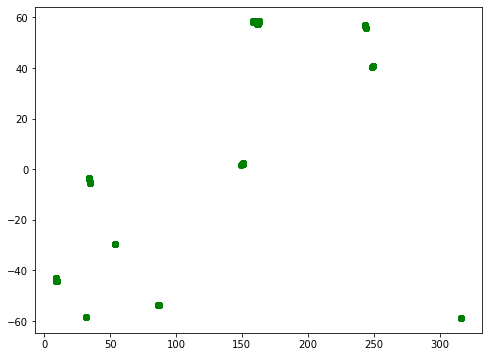

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot(xQuantityName='ra', yQuantityName='dec', plotType=3)

The above is a simple example of the plot() method being called to plot all data points in the GOGREEN survey as a function of right ascension vs declination. 

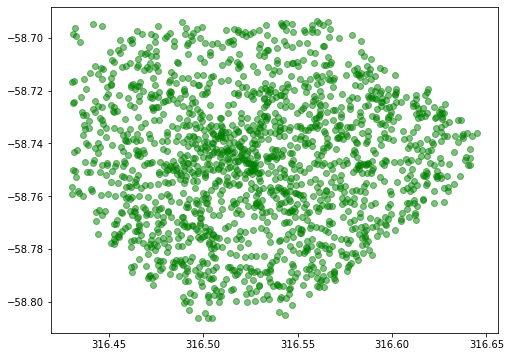

In [5]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot(xQuantityName='ra', yQuantityName='dec', plotType=1, clusterName='SPT2106')

Above we see the same RA vs DEC plot, but exclusively for the cluster SPT2106. Note that whenever param:plotType is set to 1, param:clusterName must also be provided.

<Figure size 576x432 with 0 Axes>

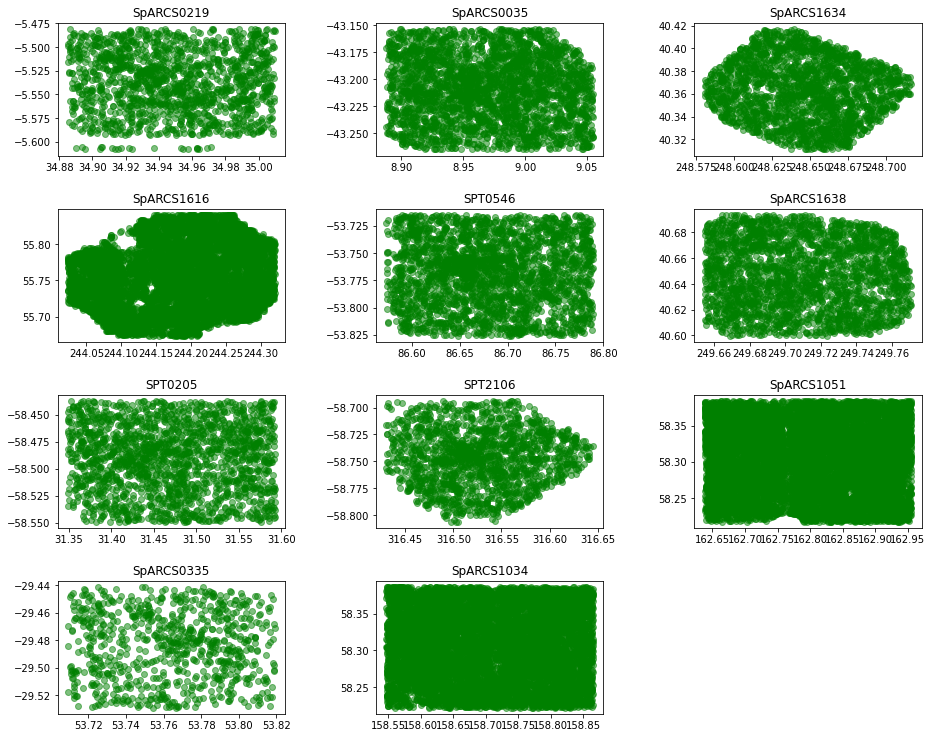

In [6]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot(xQuantityName='ra', yQuantityName='dec', plotType=2)

The above set of subplots show the same RA vs DEC plot for each of the 11 GOGREEN clusters used in this class due to their having structural parameters

Since it is not particularly useful to plot ALL data included in the survey, there are two optional parameters (to be used in tandem with standard search criteria) that enable the user to specify what data should be treated as 'good' data and therefore should be plotted:

- :param useMembers:        Flag to indicate whether only cluster members should be plotted or only non-members should be plotted.
                                    Default: 'only' - only members
                                    Value:   'not' - only non-members
                                    Value:   'all' - no restriction imposed
- :param useStandards:       Flag to indicate whether the standard search criteria should be applied
                                    Default: True

The standard search criteria, which can be toggled with param:useStandards, will be the main interface for data cuts, whereas useMembers is only a shorthand option since the distinction between members and non-members is one of the most common cuts to be made for the project this class was adapted to handle.

Note that the concept of 'good' data is not relegated only to quality cuts. If you need to plot only passive galaxies, for example, you should specify that in the standard search criteria as well. If you need to make several plots in a row with different standard search criteria, you will need to redefine the standard search criteria before each plot() call.

In [7]:
gg.standardCriteria = [
            'Star == 0',
            'K_flag < 4',
            'Mstellar > 10**9.8',
            '(1 < zspec < 1.5) or ((((Redshift_Quality != 3) and (Redshift_Quality != 4)) or (SPECID < 0)) and (1 < zphot < 1.5))',
            'cluster_id <= 12',
            'totmask == 0',
            'Fit_flag > 2',
            'n < 6',
            'HSTFOV_flag == 1',
            're > 0'
]

The above code shows how to set standard search criteria prior to a call to plot(). All criteria given should reflect specifications in catalog parameters for a catalog object, and should follow the syntax shown above.

<Figure size 576x432 with 0 Axes>

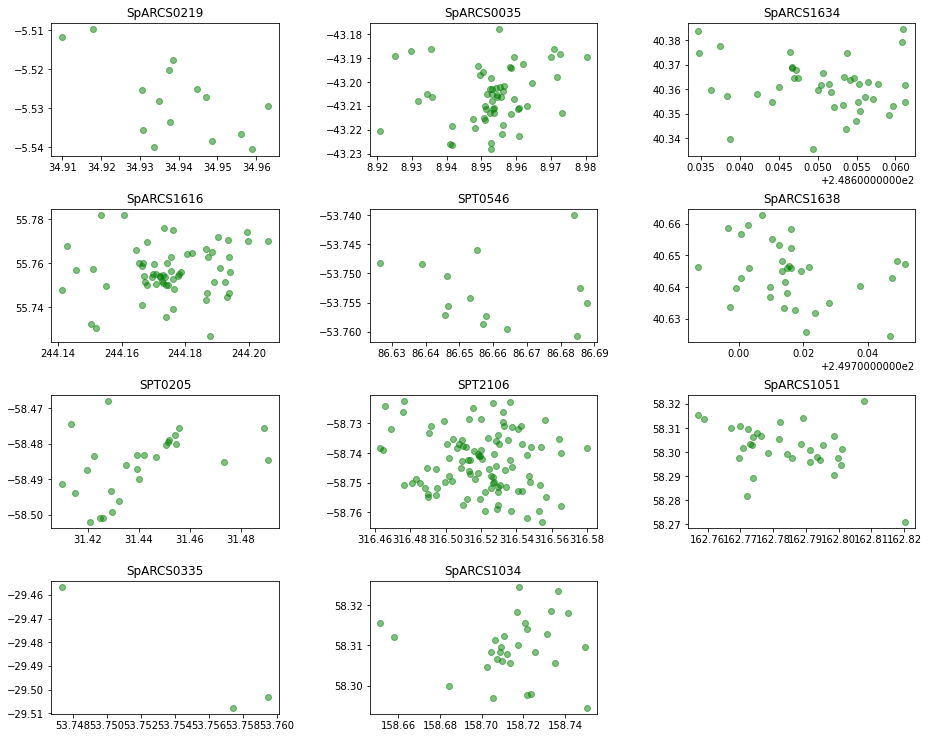

In [8]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot(xQuantityName='ra', yQuantityName='dec', plotType=2, useMembers='only')

The above subplots show again the RA vs DEC of the 11 clusters with structural parameters, this time with standard search criteria set (the parameter does not need to be specified because standard search criteria is used by default if set) and only members being specified with param:useMembers.

The following parameters are included as a means to alter/improve the appearance of plots made with plot():

- :param colorType:          Specifies how to color code the plotted galaxies
                                    Default: None
                                    Value:   'catalog' - spectroscopic vs photometric catalog source
                                    Value:   'passive' - passive vs star forming
                                    Value:   'sersic' -  elliptical vs spiral
                                    Value:   'environment' - cluster vs field
                                    Value:   'environmentQ' - cluster vs field (quiescent only)
                                    Value:   'environmentSF' - cluster vs field (star-forming only)
- :param colors:             Specifies what colors should be used when plotting
                                    Default: None - default colors are used
                                    Value:   [(r,g,b), (r,g,b)]
- :param xRange:             List containing the desired lower and upper bounds for the x-axis
                                    Default: None
- :param yRange:             List containing the desired lower and upper bounds for the y-axis
                                    Default: None
- :param xLabel:             Label to put on the x-axis
                                    Default: Empty string
- :param yLabel:             Label to put on the y-axis
                                    Default: Empty string
- :param useLog:             Flag to indicate whether the x- or y-axis should be in log scale
                                    Default: [False,False] - neither axis in log scale
                                    Value:   [False,True] - y axis in log scale
                                    Value:   [True,False] - x axis in log scale
                                    Value:   [True,True] - both axis in log scale

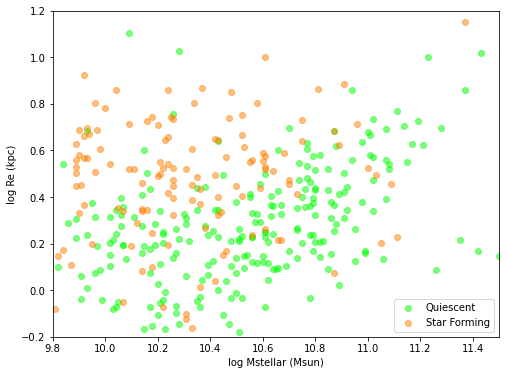

In [9]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', 
            colorType='passive', colors=[(0,1,0),(1,0.5,0)],
            xLabel='log Mstellar (Msun)', yLabel='log Re (kpc)', 
            xRange=[9.8,11.5], yRange=[-0.2,1.2],
            useLog=[True,True])

The above stellar mass vs effective radius (member galaxies) plot illustrates the use of all seven visual parameters described above, with axis range limits, axis labels, user-specified green and orange colors, categorization based on SFR (includes a legend), and use of log scale.

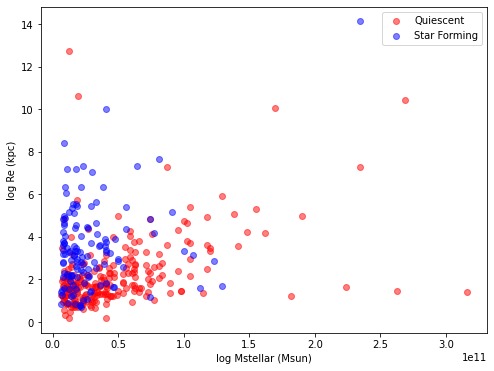

In [10]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', 
            colorType='passive', 
            xLabel='log Mstellar (Msun)', yLabel='log Re (kpc)')

The above plot showcases the same data as the previous plot, but with default colors, without axis range limits, and in linear space

Lastly, there are four parameters I have added to the class to allow for plotting of additional information alongside the data:

- :param fitLine:            Flag to indicate whether a best fit line should be fit to the data. By default this line will plot size vs mass. 
                                    Default: False
- :param bootstrap:           Flag to indicate rather bootstrapping should be used to calculate and display uncertainty on the fit 
                                    Default: True
- :param plotErrBars:         Flag to indicate whether individual galaxies should have their Re error plotted
                                    Default: False
- :param plotTransitionType:  Allows for plotting a third category of data alongside two others (intended for use alongside 'passive' color type
                                    Default: None
                                    Value: GV - plot green valley trend
                                    Value: BQ - plot blue quiescent trend    
                                    Value: PSB - plot post-starburst trend                     

Quiescent count: 239
Star Forming count: 128


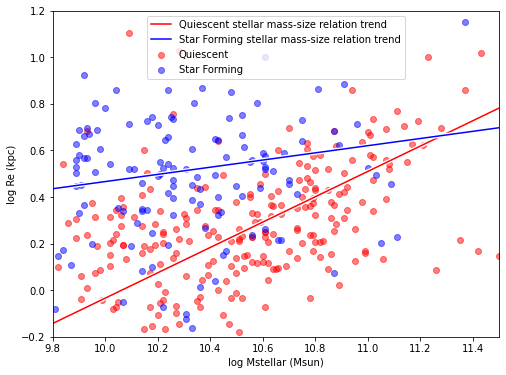

In [11]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', 
            colorType='passive',
            xLabel='log Mstellar (Msun)', yLabel='log Re (kpc)', 
            xRange=[9.8,11.5], yRange=[-0.2,1.2],
            useLog=[True,True],
            fitLine=True, bootstrap=False)

The above plot demonstrates the stellar mass vs effective radius of quiescent and star-forming member galaxies in the survey with the trendlines calculated for these populations.

Note that standard search criteria need to be carefully tailored when calculating trend lines, as bad data can cause the program to crash.

Quiescent count: 239
Star Forming count: 128


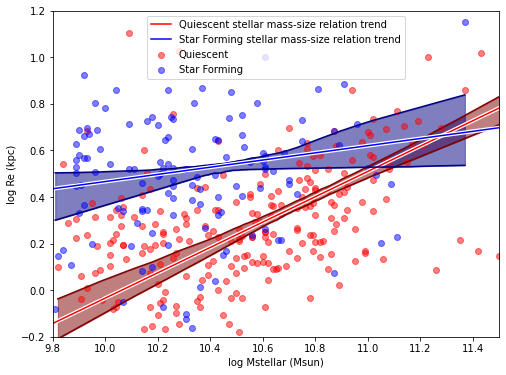

In [12]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', 
            colorType='passive',
            xLabel='log Mstellar (Msun)', yLabel='log Re (kpc)', 
            xRange=[9.8,11.5], yRange=[-0.2,1.2],
            useLog=[True,True],
            fitLine=True)

Above is the same plot as previous, only param:bootstrap is not set to False, meaning bootstrap uncertainties are shown (as they are by default)

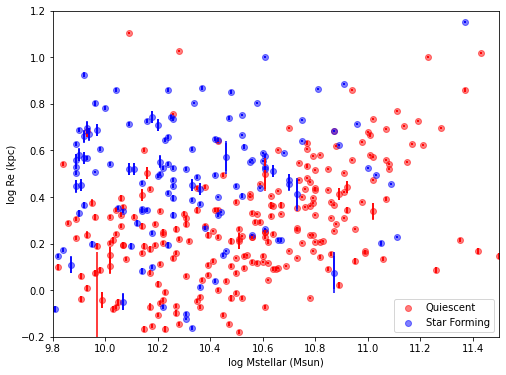

In [13]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', 
            colorType='passive',
            xLabel='log Mstellar (Msun)', yLabel='log Re (kpc)', 
            xRange=[9.8,11.5], yRange=[-0.2,1.2],
            useLog=[True,True],
            plotErrBars=True)

Above the same data is shown with individual error bars on data points

Quiescent count: 239
Star Forming count: 128
Green Valley count: 53


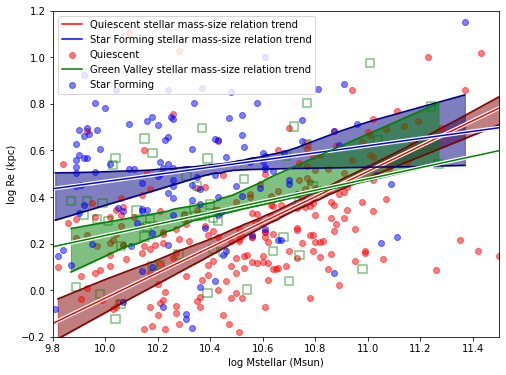

In [14]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', 
            colorType='passive',
            xLabel='log Mstellar (Msun)', yLabel='log Re (kpc)', 
            xRange=[9.8,11.5], yRange=[-0.2,1.2],
            useLog=[True,True],
            fitLine=True,
            plotTransitionType='GV')

Above the same data is shown with the additional inclusion of the green valley population categorization. Trendlines and bootstrap uncertainties are shown as well. Note that in the current iteration of the class, the trendline for the transition type will be displayed regardless of whether param:fitLine is set to True (setting param:bootstrap to false will still have the intended effect however). This minor oversight can be corrected as needed.

## The CompTrends Method

The compTrends() method is the other primary avenue for user interface with the class and was designed to be a modular collection of tools more specifically tailored to my specific subject of research, being the stellar mass-size relation. While it has no mandatory parameters, due to its modular nature the param:plotType is vital to understand as this dictates the behavior of the method.

- :param x:           X value at which the comparison should be made
                             Default: None
- :param y:           Y value at which the comparison should be made
                             Default: None
- :param bootstrap:   Flag to indicate rather bootstrapping should be used to calculate and display uncertainty on the fit 
                             Default: True
- :param plotType:    Determines specific behavior of the function
                             Value: "default" - quiescent and star-forming ratios are calculated separately
                             Value: "transition" - transition lines are plotted as well
                             Value: "lit" - whole population's ratio is calculated and compared to the literature.



In [15]:
gg.standardCriteria = [
            'Star == 0',
            'K_flag < 4',
            'Mstellar > 10**9.8',
            '(1 < zspec < 1.5) or ((((Redshift_Quality != 3) and (Redshift_Quality != 4)) or (SPECID < 0)) and (1 < zphot < 1.5))',
            'cluster_id <= 12',
            'totmask == 0',
            'Fit_flag > 2',
            'n < 6',
            'HSTFOV_flag == 1',
            're > 0'
]

As with param:fitLine of the plot() method, we need to define our standard search criteria carefully before calling compTrends(), as bad data can cause the trend calculations to crash.

Quiescent cluster count: 239
Star-Forming cluster count: 128
Quiescent field count: 66
Star-Forming field count: 106
(0.7236260952194101, 1.069041820912672)


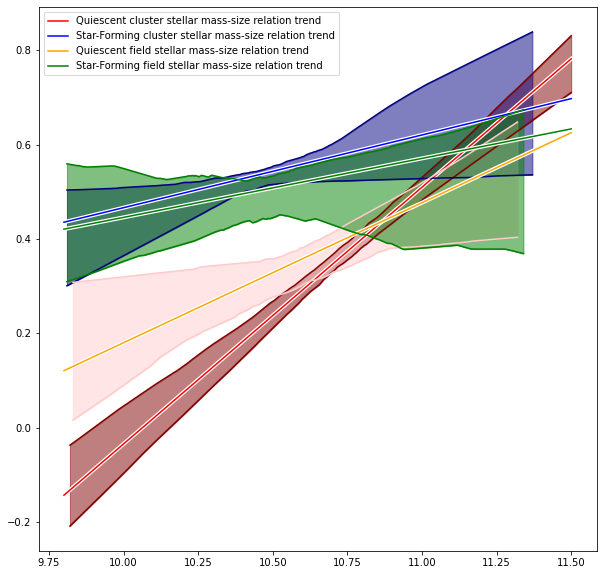

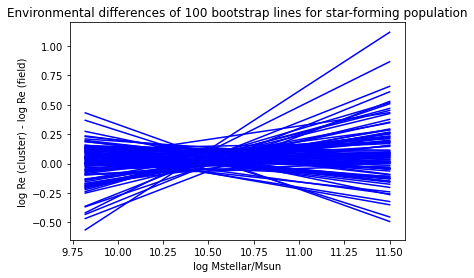

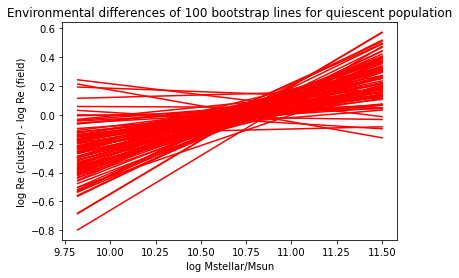

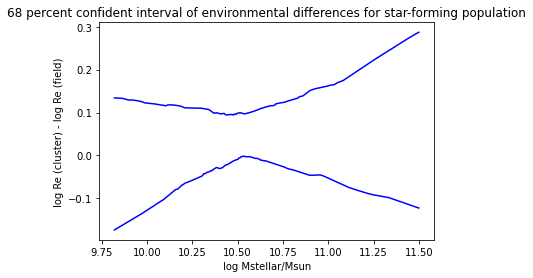

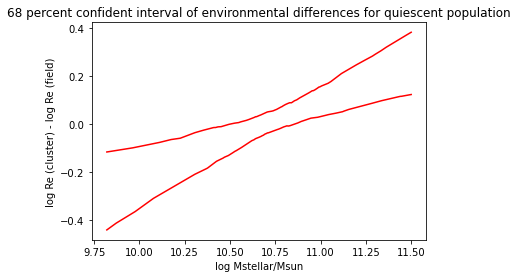

In [16]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    ratio = gg.compTrends(x=10.5)
    print(ratio)

The above plots demonstrate the default mode of the compTrends() method, in which the stellar mass-size relation trend for members vs non-members in quiescent and star-forming populations are displayed. Because param:bootstrap is not set to False, the bootstrap uncertainties are plotted with these trends. For the default module, param:bootstrap being set to True also means four additional plots are created displaying the differences between the two bootstrap uncertainies for both populations, and the 68% confidence region of those differences, both as a function of mass. These additional plots could use some work.

The return value being printed before the plots is the ratio of member size over non-member size at the mass specified with param:x. Note that you can provide a param:y instead (you must always provide one and only one of these two parameters) to get the ratio of member mass over non-member mass at the specified size instead. Not sure if this would ever be useful but it's an option

Quiescent cluster count: 239
Star-Forming cluster count: 128
Quiescent field count: 66
Star-Forming field count: 106
GV cluster count: 53
GV field count: 20
BQ cluster count: 37
BQ field count: 25
PSB cluster count: 17
PSB field count: 7
(0.7236260952194101, 1.069041820912672)


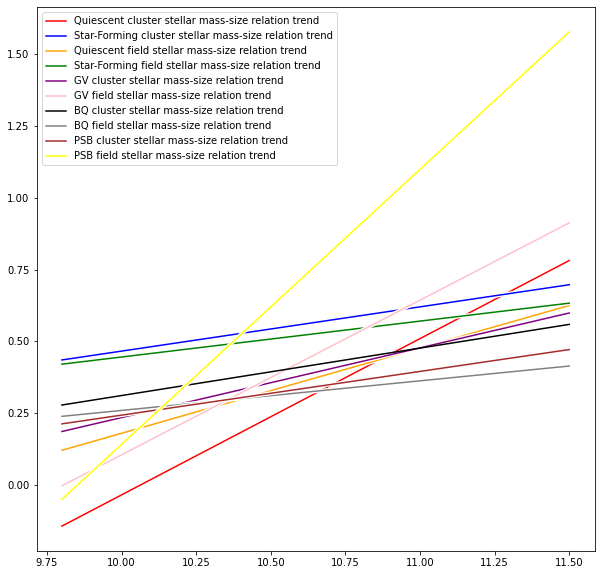

In [17]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    ratio = gg.compTrends(x=10.5, bootstrap=False, plotType='transition')
    print(ratio)

The above plot demonstrates the 'transition' mode of the compTrends() method, in which in addition to quiescent and star-forming, the member vs non-member stellar mass-size relation trends are plotted for green valley, blue quiescent, and post-starburst populations. Note that param:bootstrap has been set to False here to avoid clogging up the graph.

Note that the ratio return here is the same as previous, as this calculation is done the same way for the transition mode as well as the default.

cluster count: 420
field count: 192
(0.8399170248563219, nan)


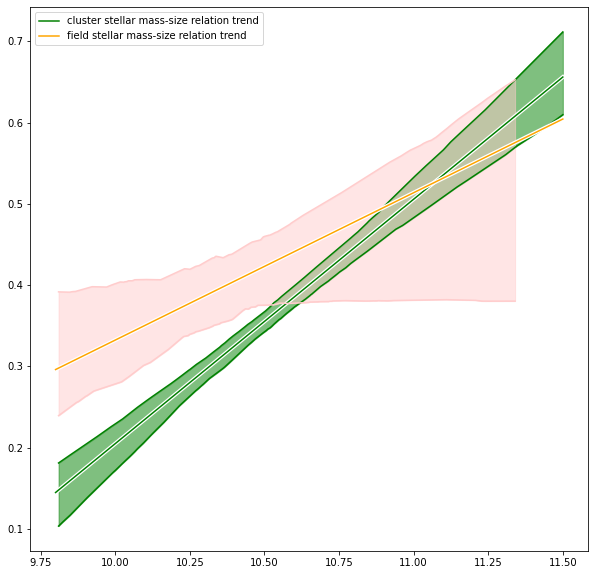

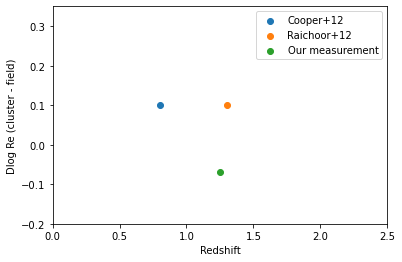

In [18]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    ratio = gg.compTrends(x=10.5, plotType='lit')
    print(ratio)

The above plots demonstrate the 'lit' mode of the compTrends() method, in which the overall (non-population specific) member vs non-member stellar mass-size relation trends are plotted together. This plot is functionally reproducable using the plot() method, so the main focus is on the second plot, which plots the difference in effective radius of the cluster and field at a certain mass as found by different studies (including our own) as a function of redshift. This plot should be considered a proof of concept for the time being, as the implementation is far from complete.

Note that for this module, the ratio returned is different and only contains a single value. This is because the calculations are being done on the combined set of all galaxies matching the standard search criteria, as opposed to quiescent and star-forming.

## Other Public Methods (Tests)

Next we move onto the tests I have added to the class, starting with the testPlots() method. This method has two parameters:

:param outputPath:  the file path that results will be written to.
:param truthPath:  the file path that true values are stored in prior to calling, to be compared with results.

Note that these files exist already in my repository and are located at *Notebooks/testOutput.txt* and *Notebooks/truth.txt* respectively.


It takes a substantial time to complete all tests, and is intended to be as a security check after changes are made to the class' infrastructure. It runs through the full suite until a test is failed, at which point it reports the failure (in the future, it may make sense to change all tests to run even after a failure).

Note that if changes are made to the class that alter the overall size of the catalog or of selections in the catalog (for example if you instantiate the class using usePhotMembership=False), the final test will fail as it relies on the truth file stored at the location *GOGREEN-Research\Notebooks\truth.txt*. You will need to verify the resulting selection sizes in some other way, then update the truth file to reflect this altered version of the class.

Note as well that this method is not dependent on standard search criteria.

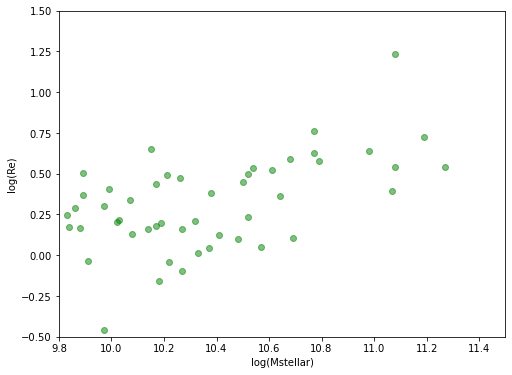

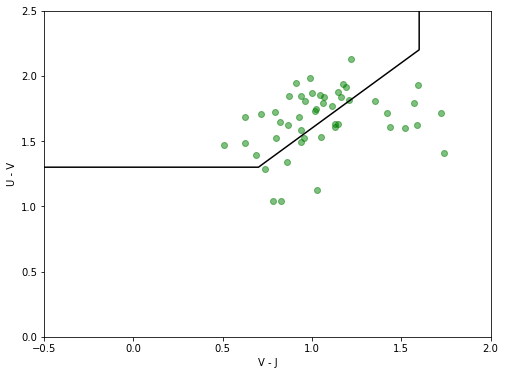

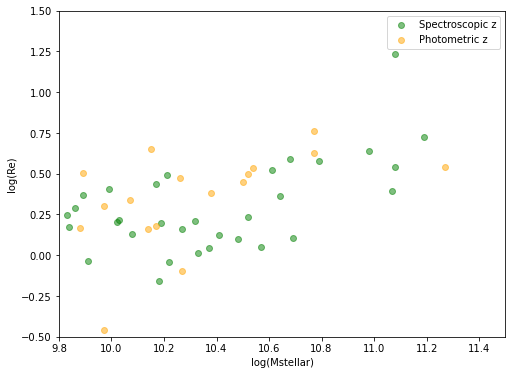

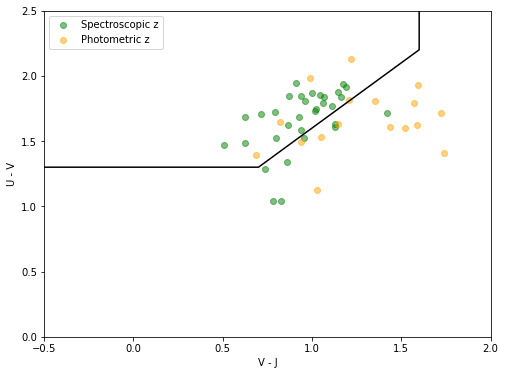

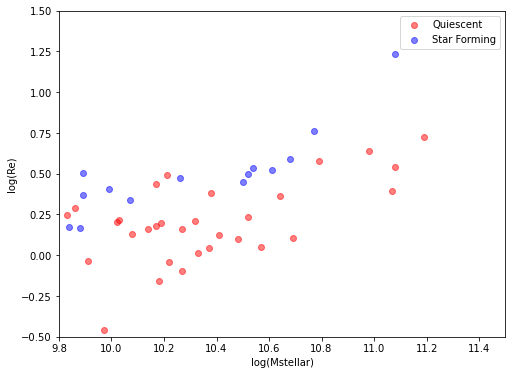

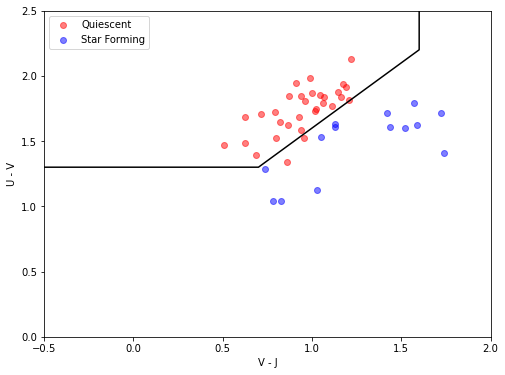

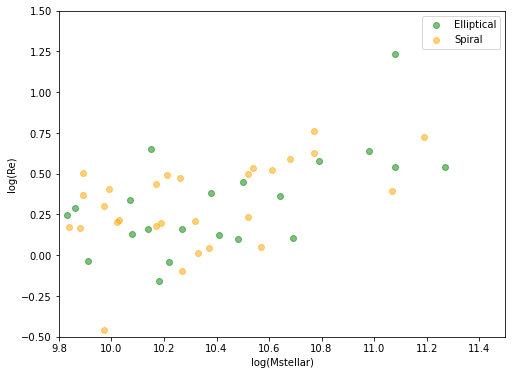

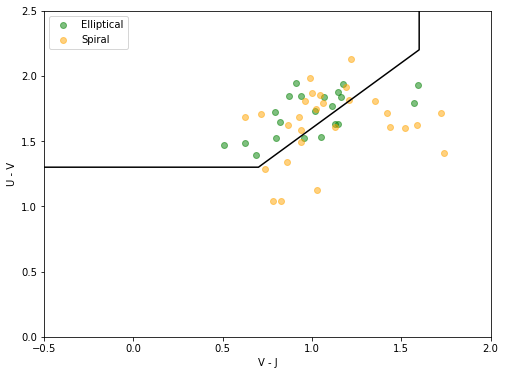

<Figure size 576x432 with 0 Axes>

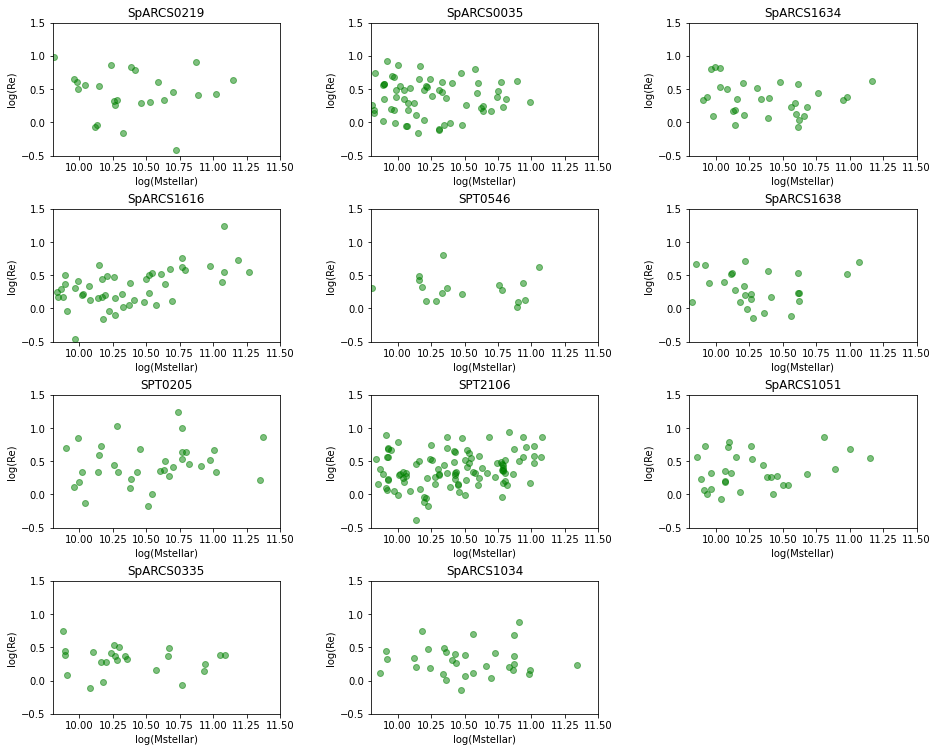

<Figure size 576x432 with 0 Axes>

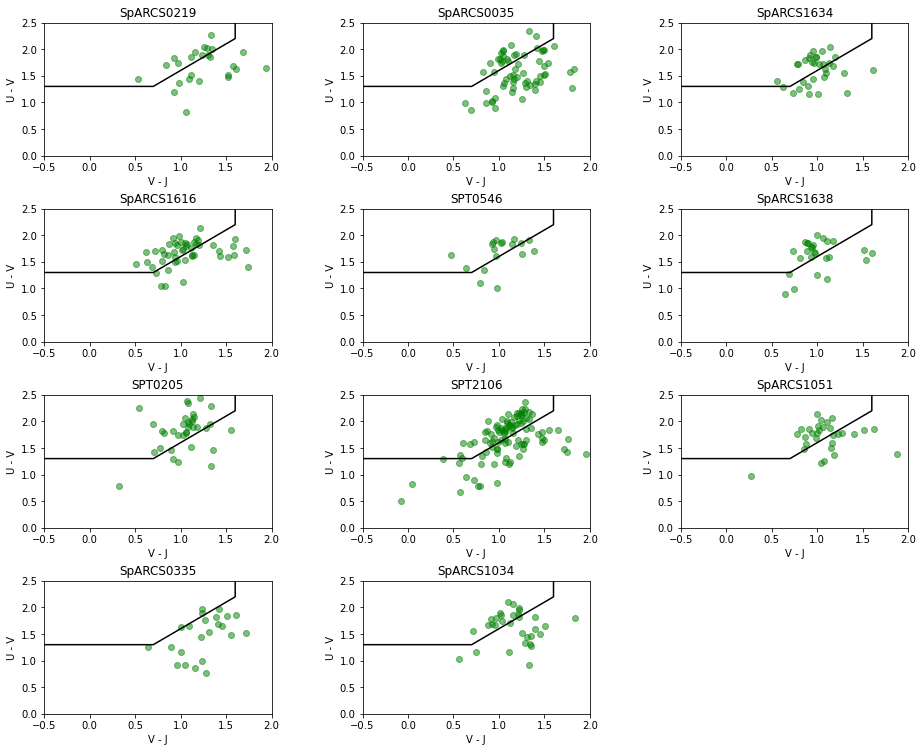

<Figure size 576x432 with 0 Axes>

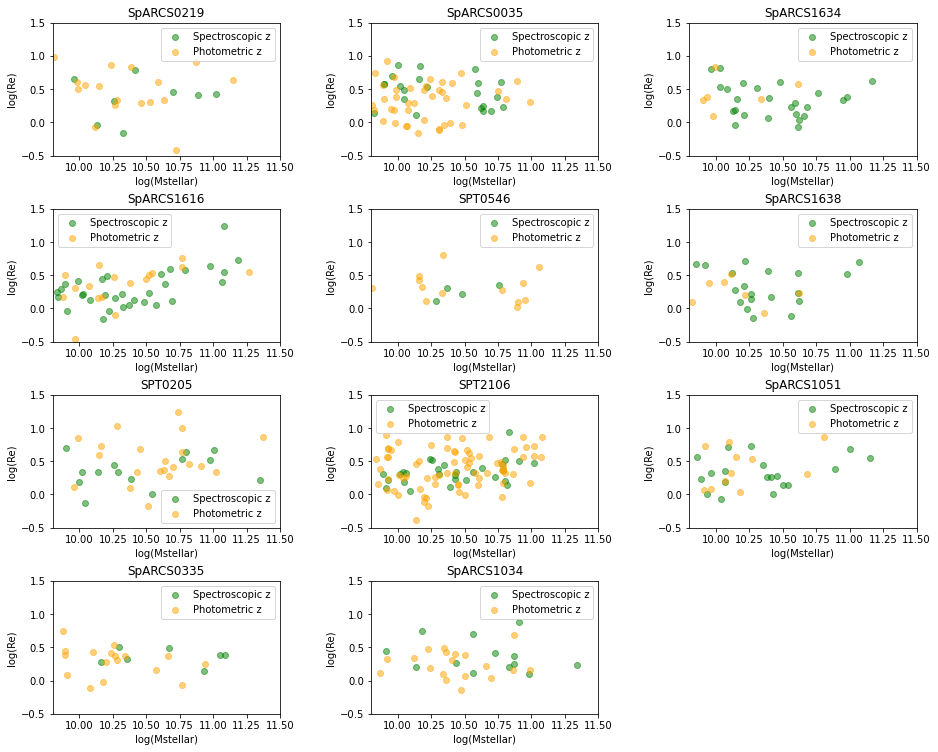

<Figure size 576x432 with 0 Axes>

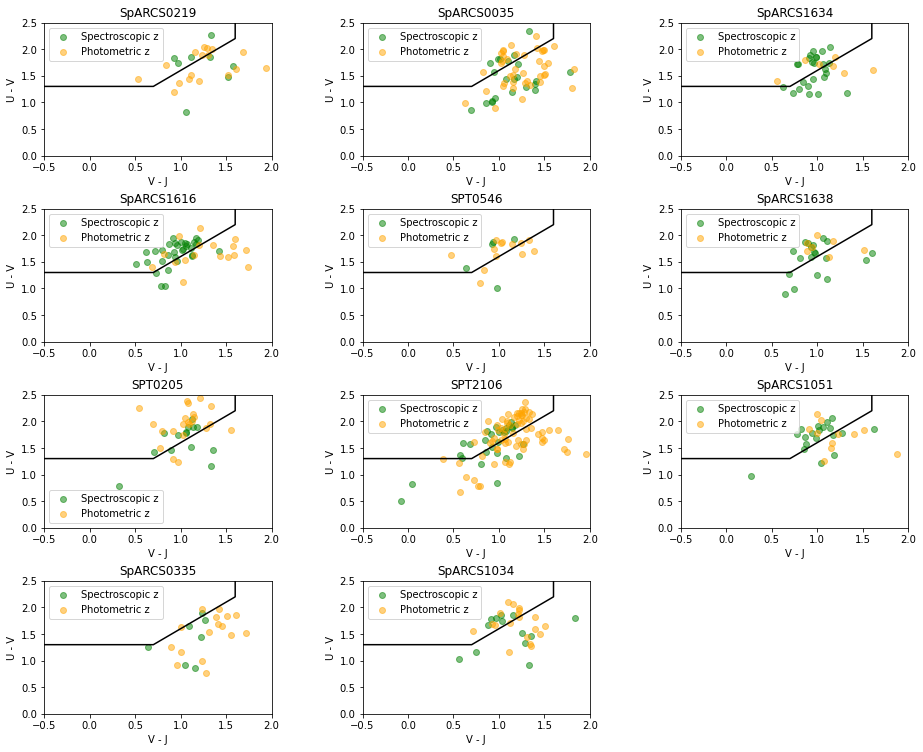

<Figure size 576x432 with 0 Axes>

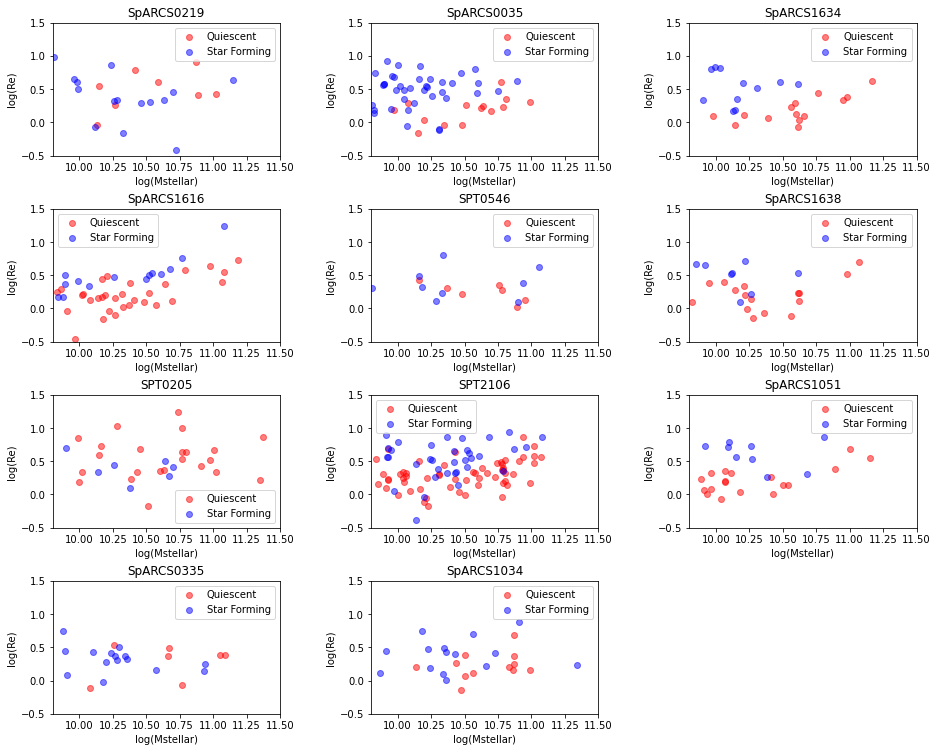

<Figure size 576x432 with 0 Axes>

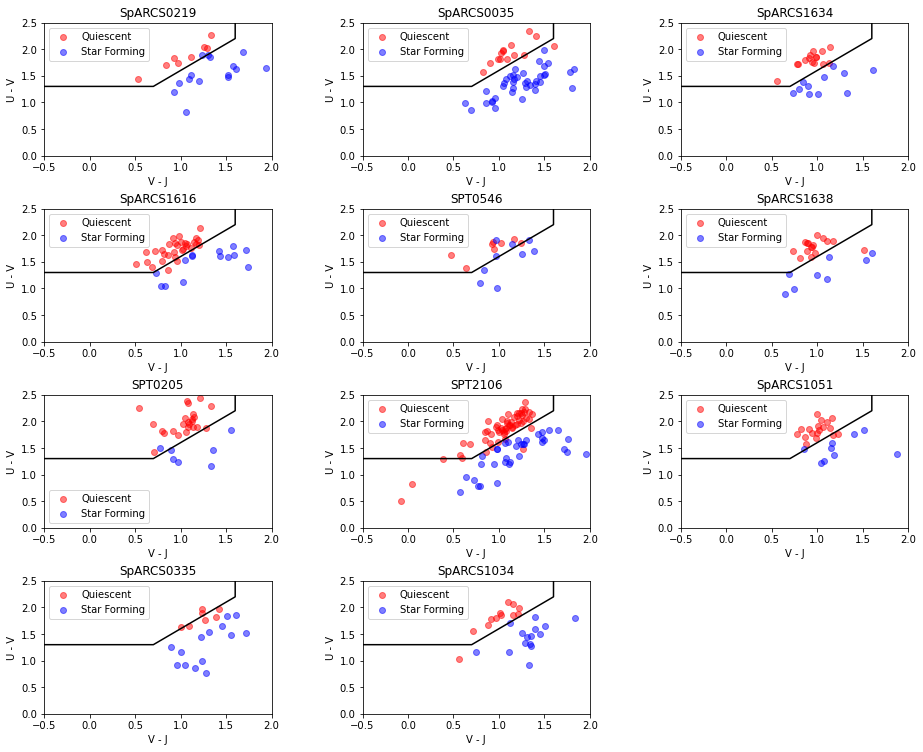

<Figure size 576x432 with 0 Axes>

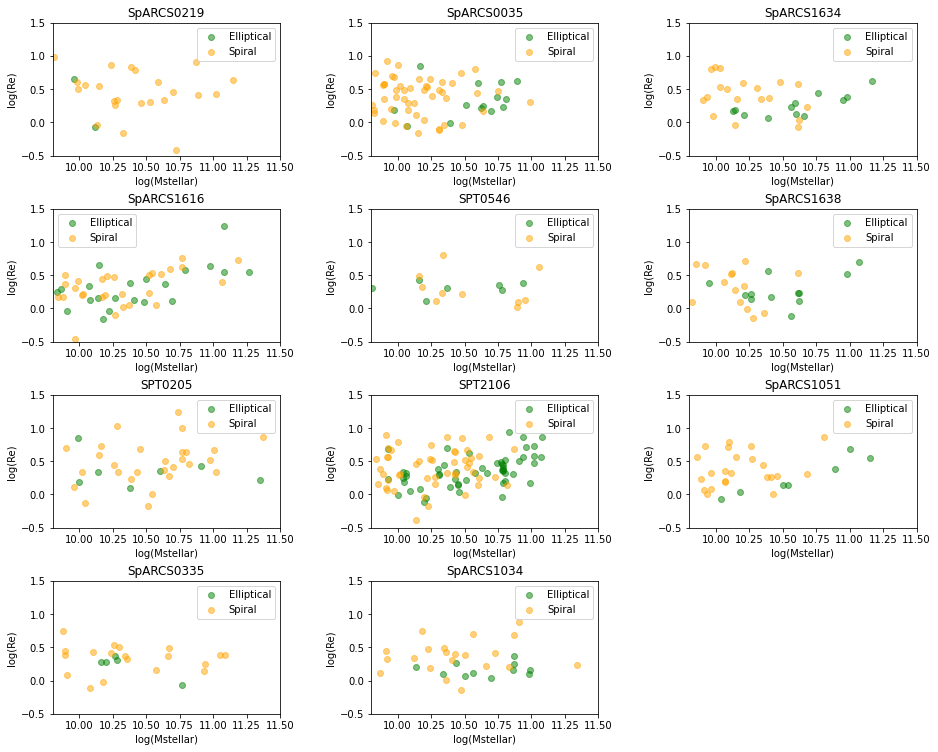

<Figure size 576x432 with 0 Axes>

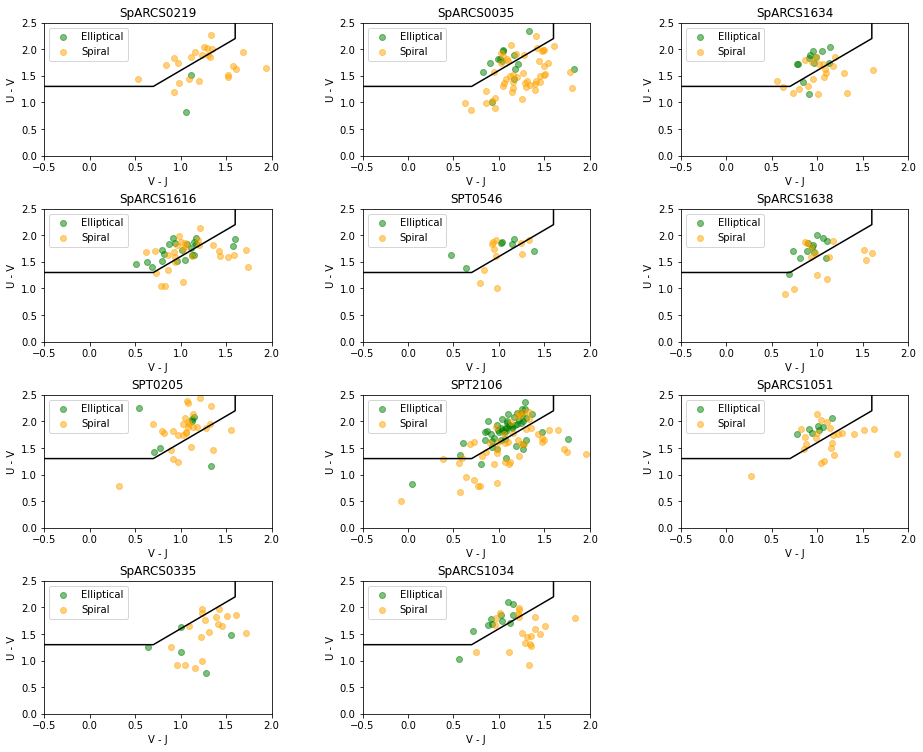

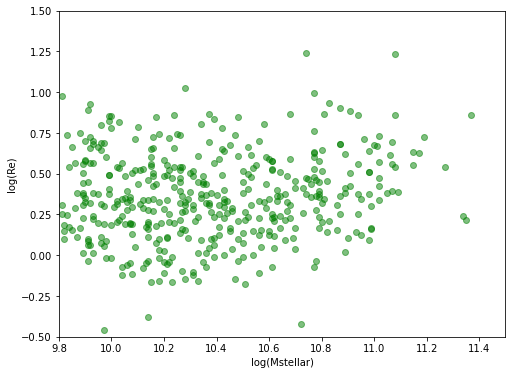

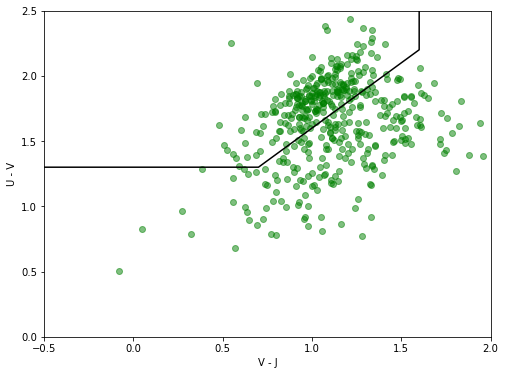

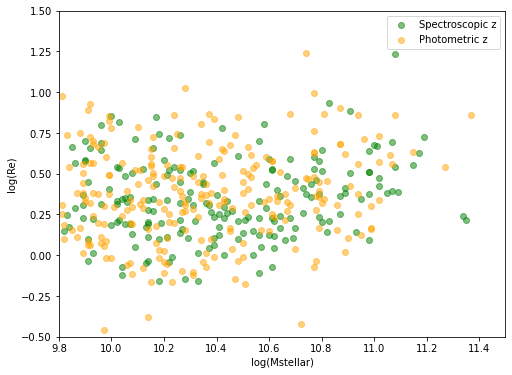

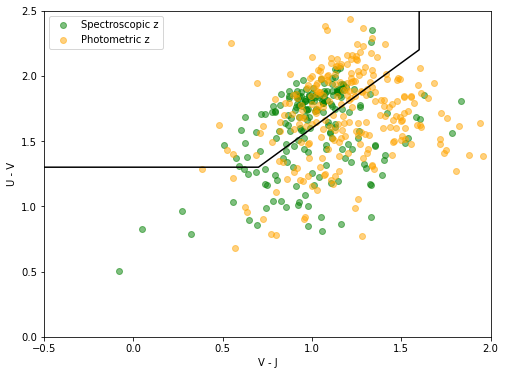

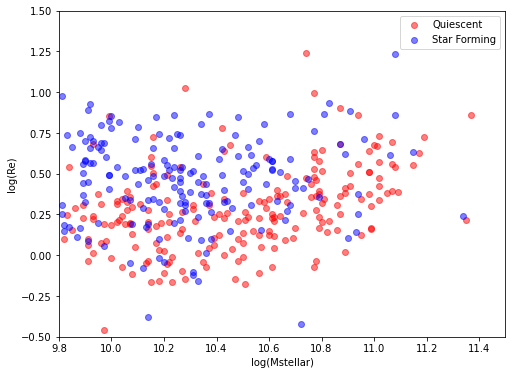

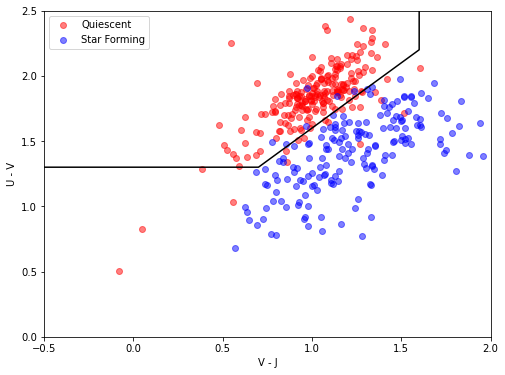

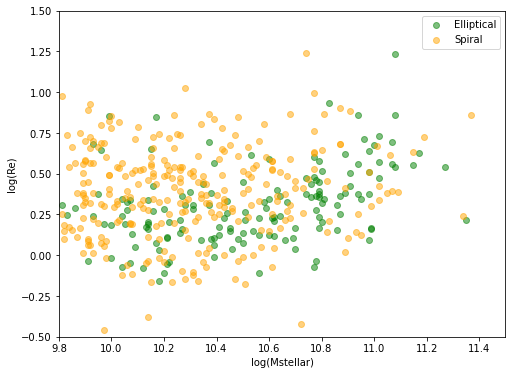

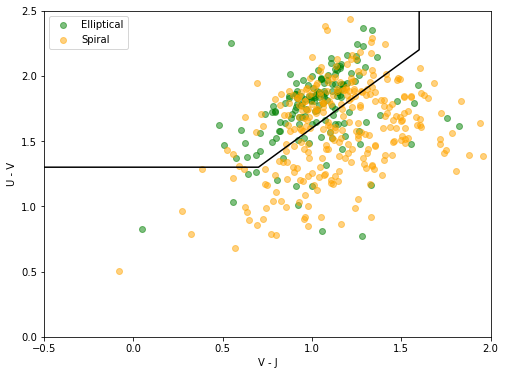

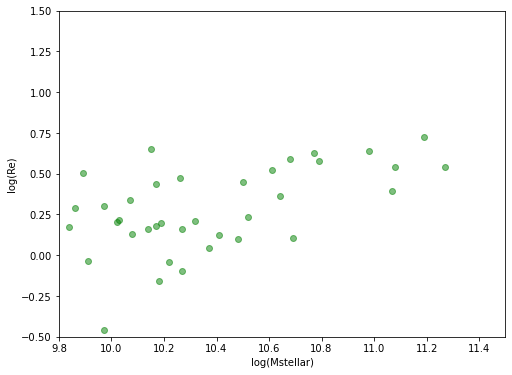

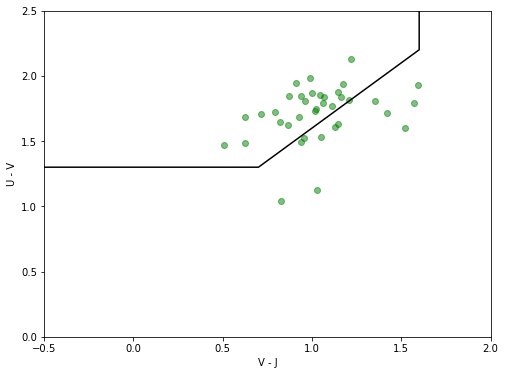

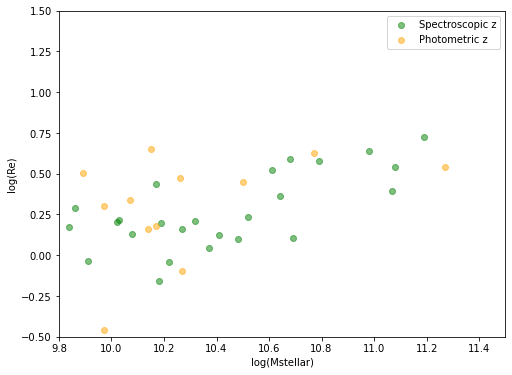

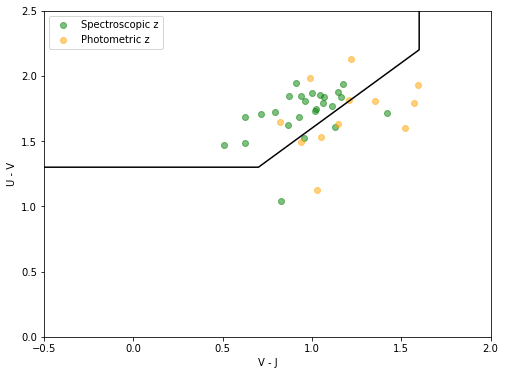

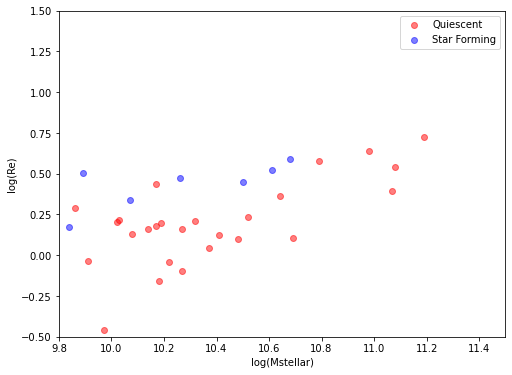

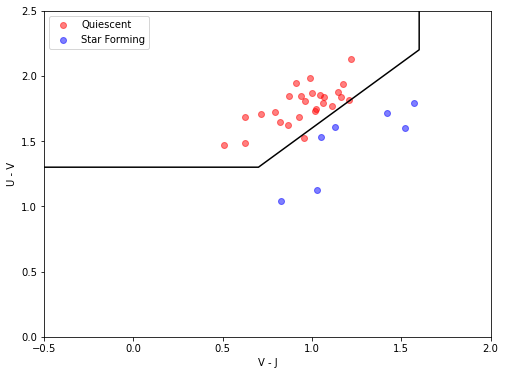

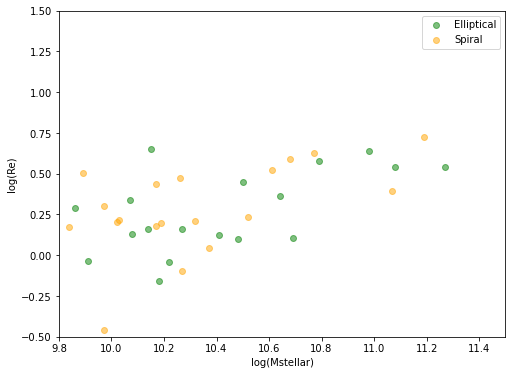

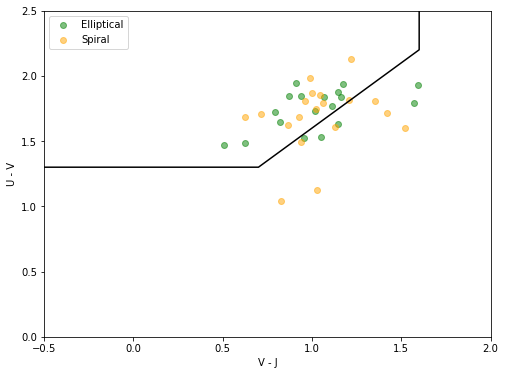

<Figure size 576x432 with 0 Axes>

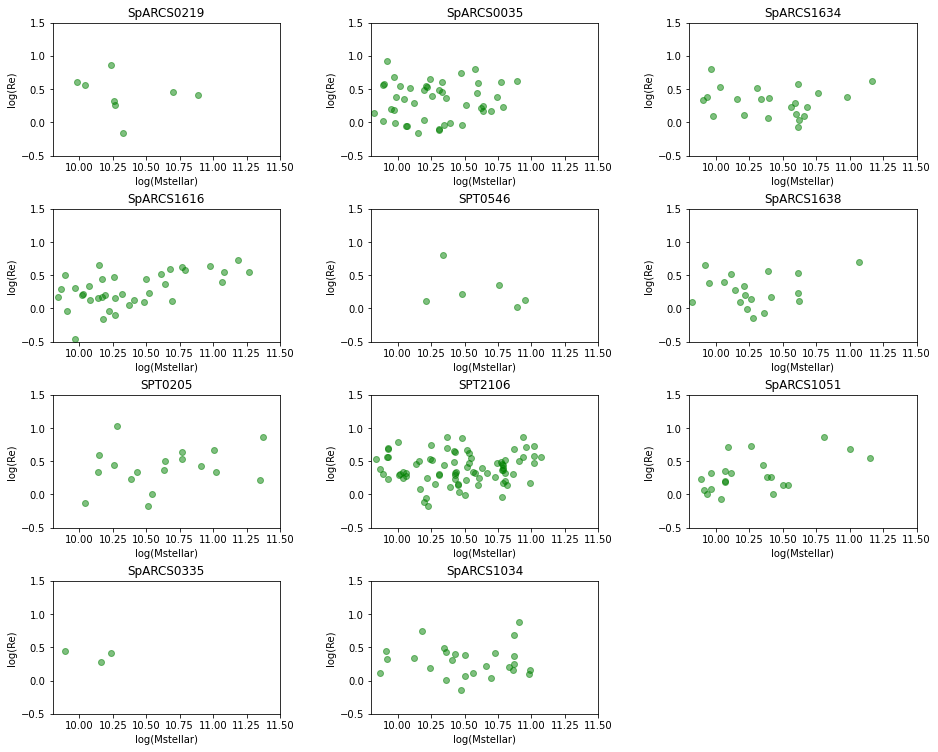

<Figure size 576x432 with 0 Axes>

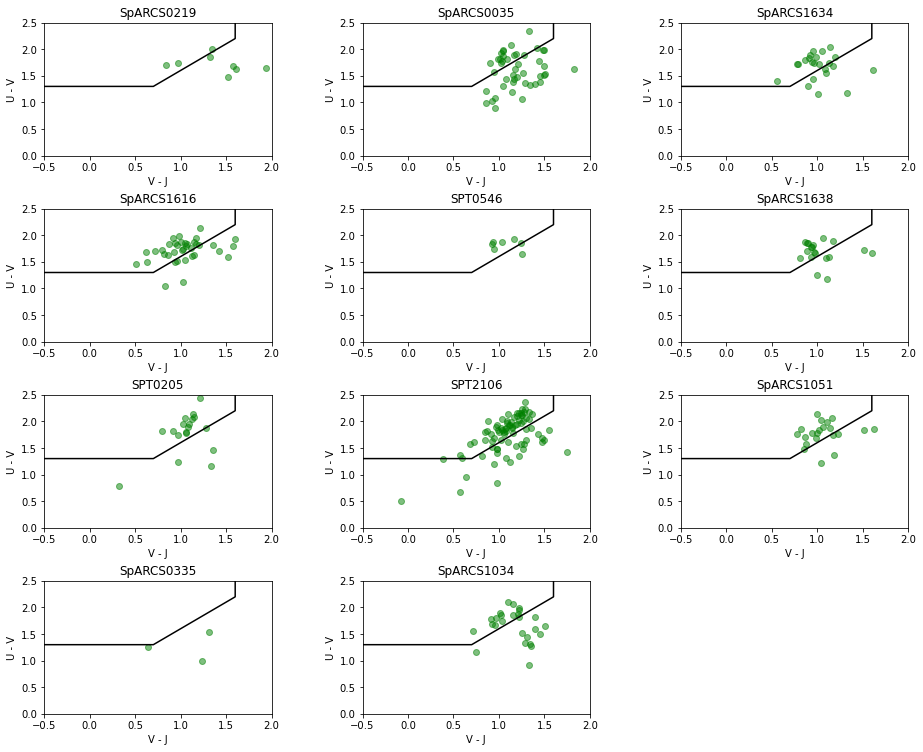

<Figure size 576x432 with 0 Axes>

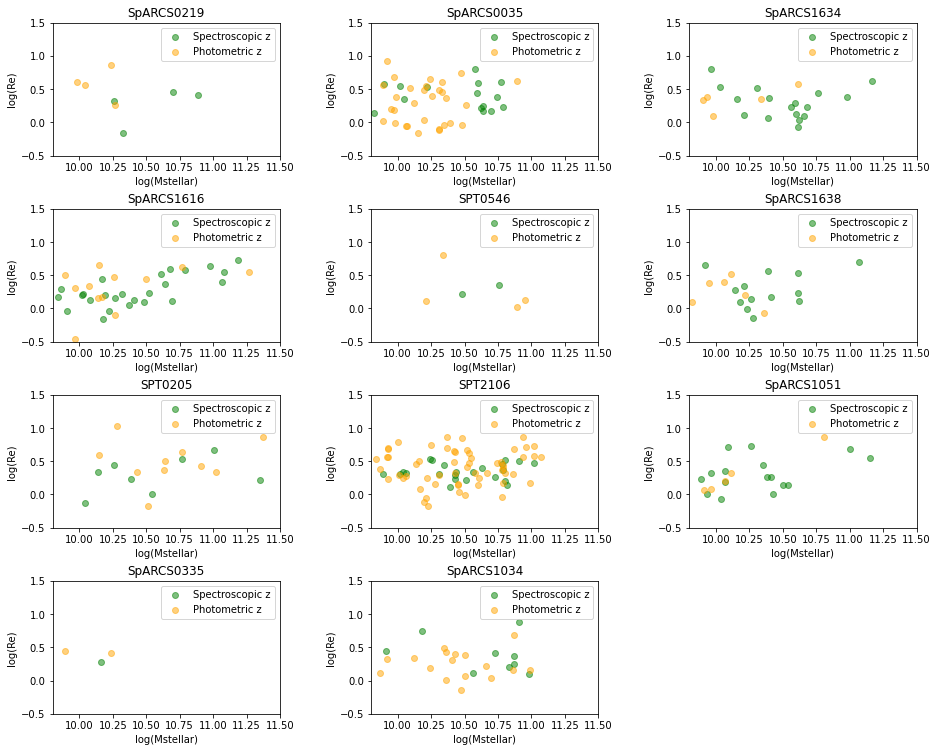

<Figure size 576x432 with 0 Axes>

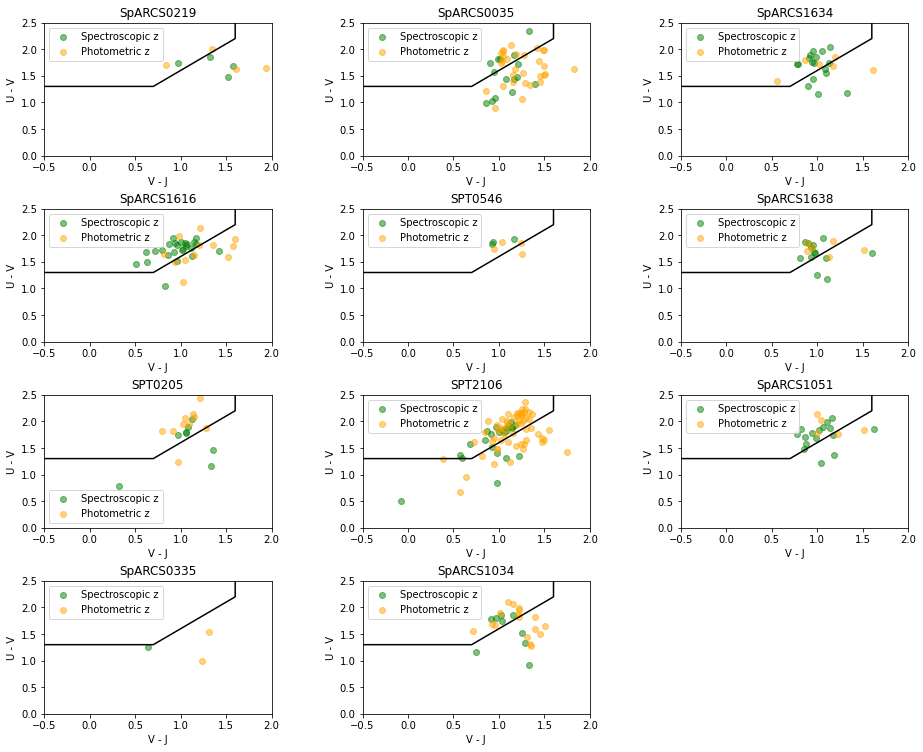

<Figure size 576x432 with 0 Axes>

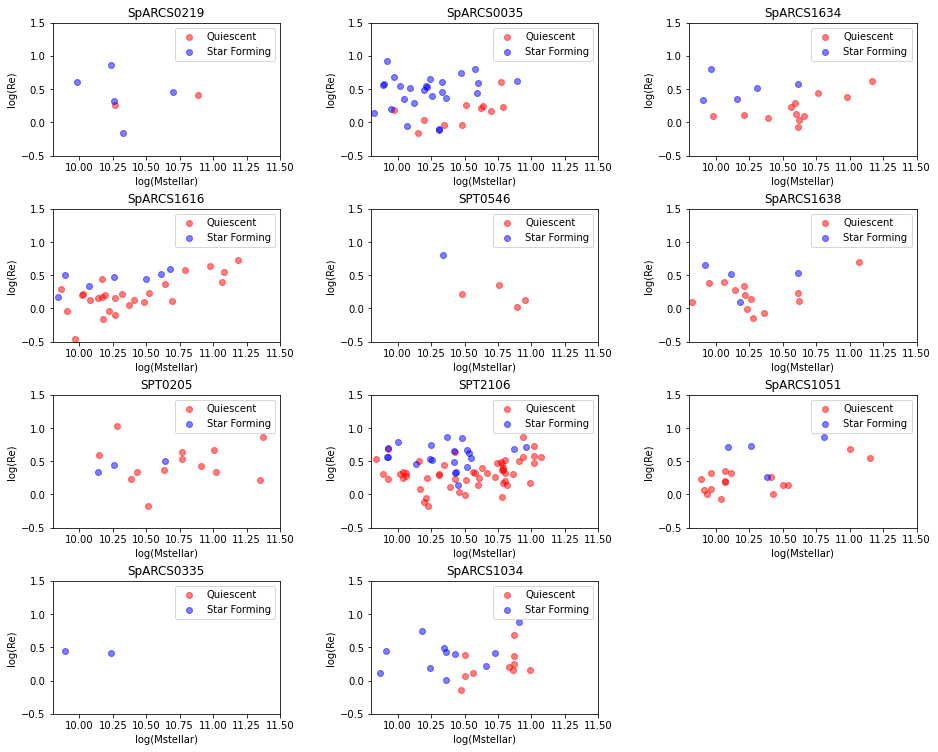

<Figure size 576x432 with 0 Axes>

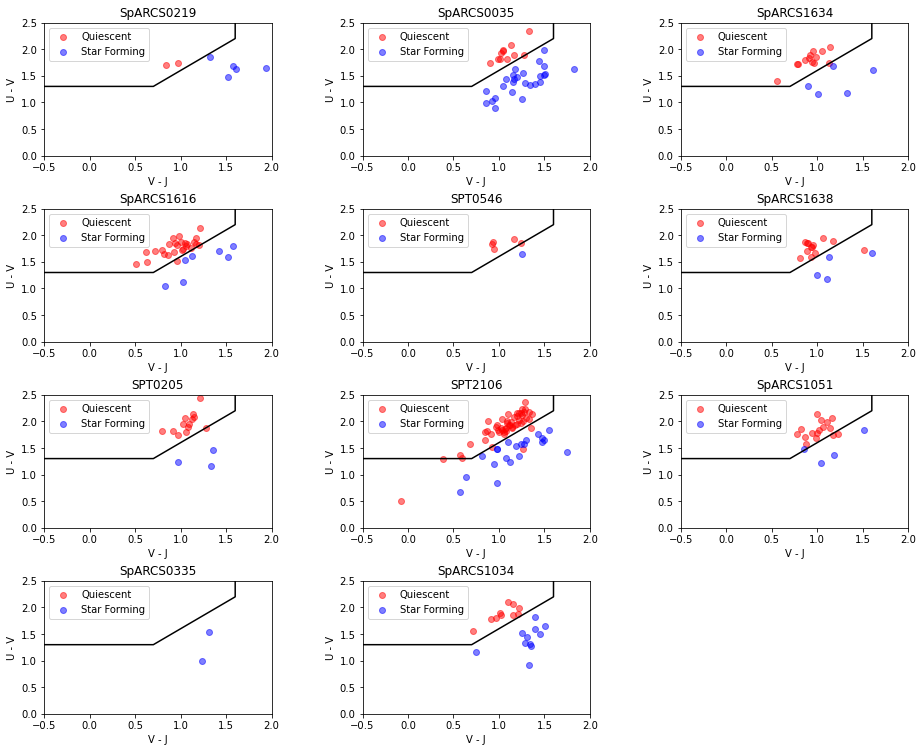

<Figure size 576x432 with 0 Axes>

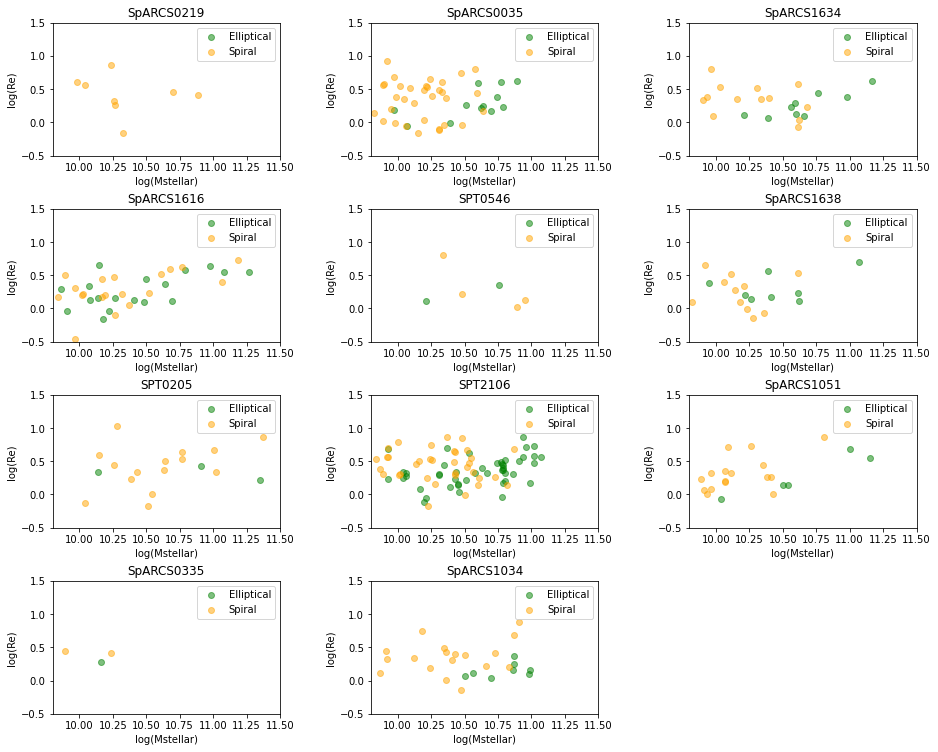

<Figure size 576x432 with 0 Axes>

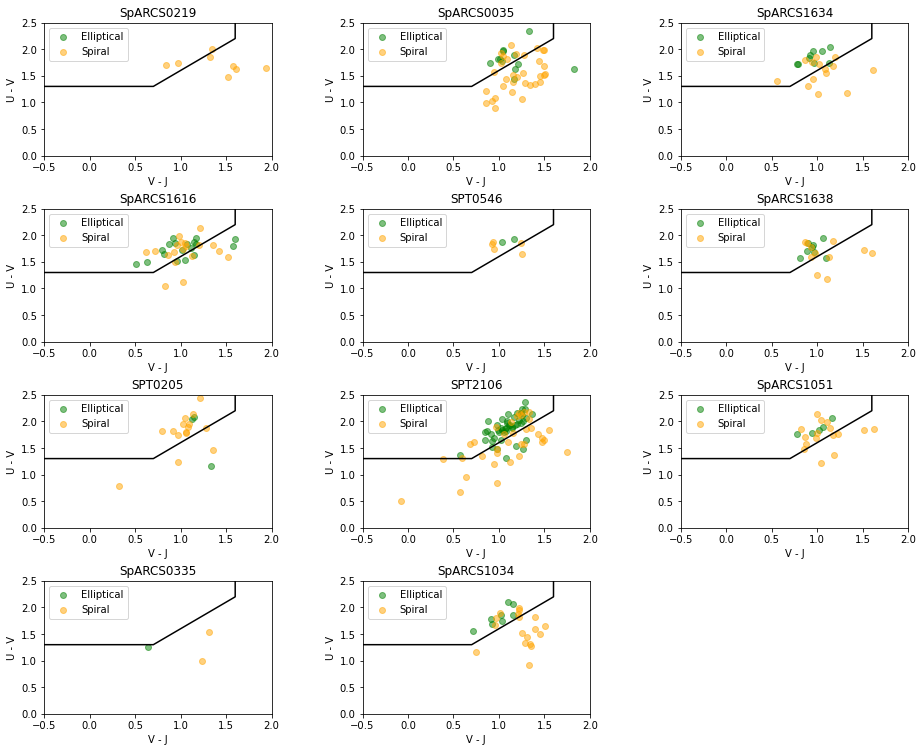

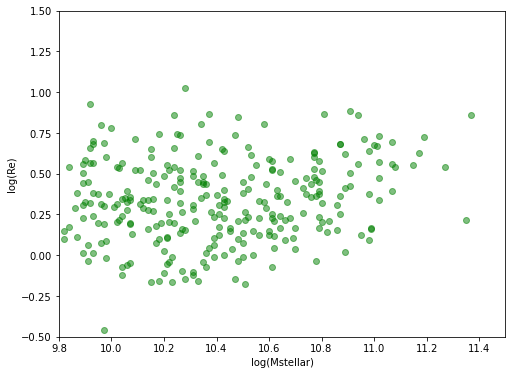

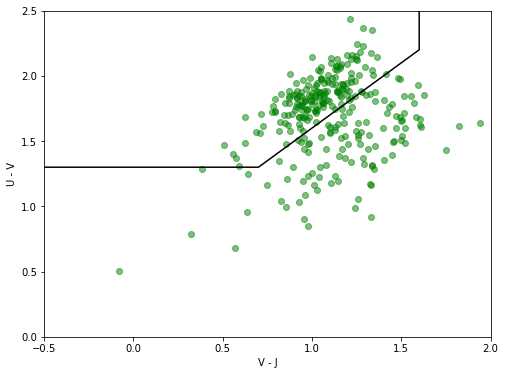

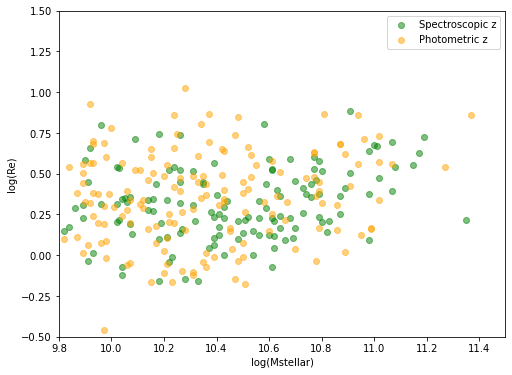

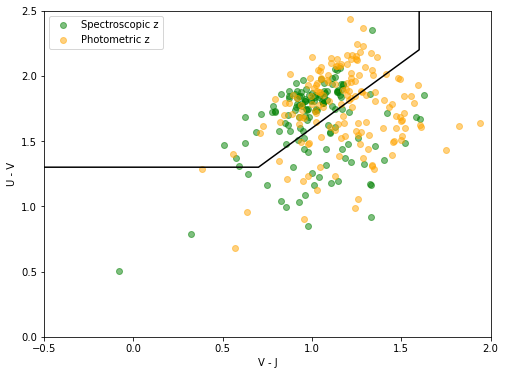

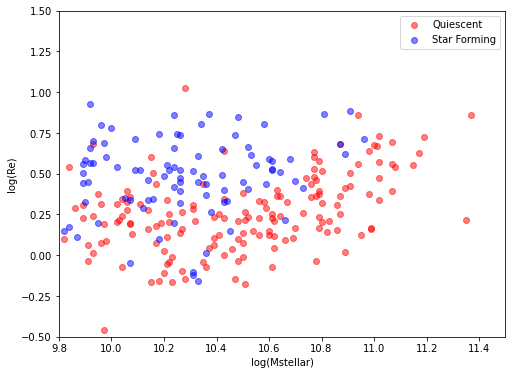

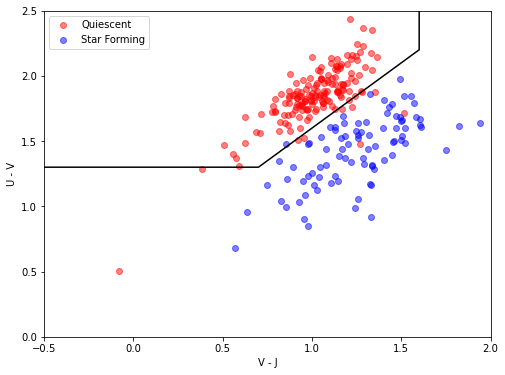

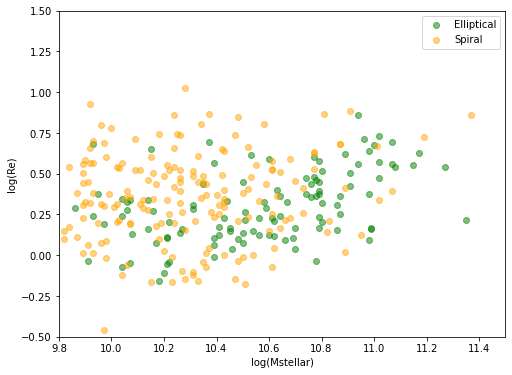

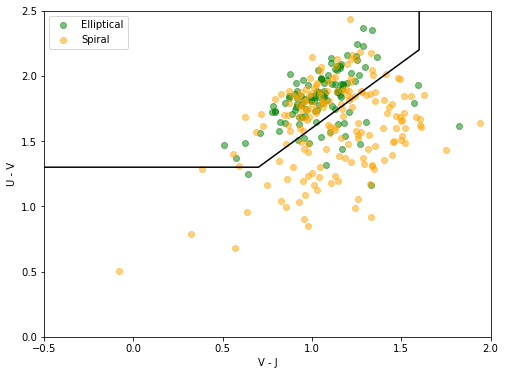

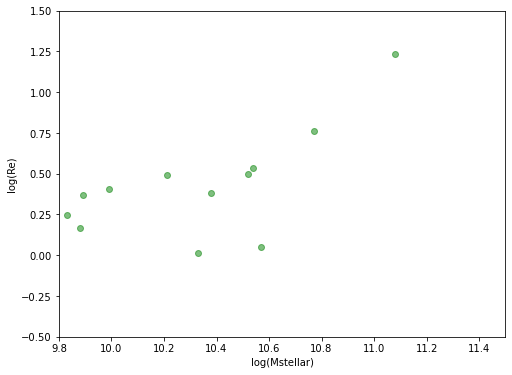

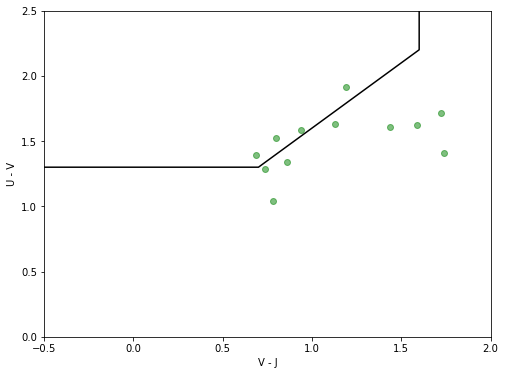

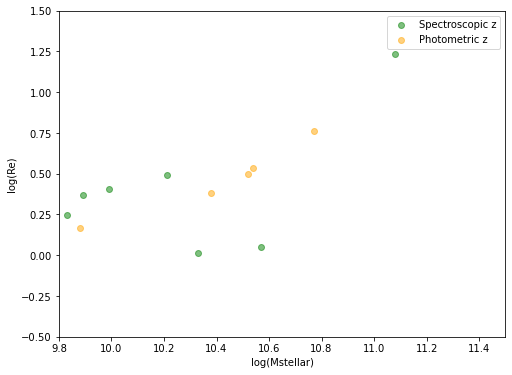

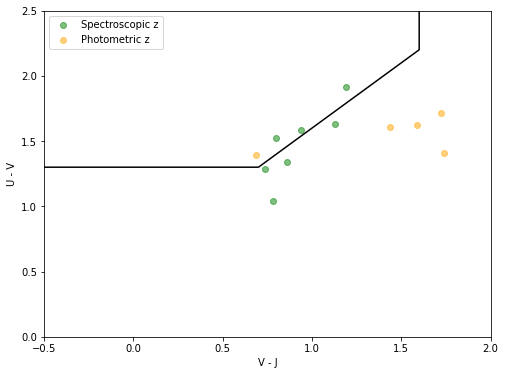

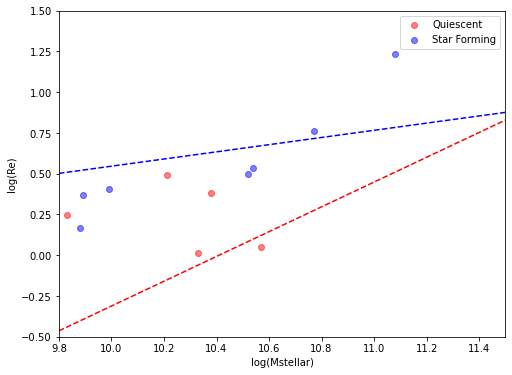

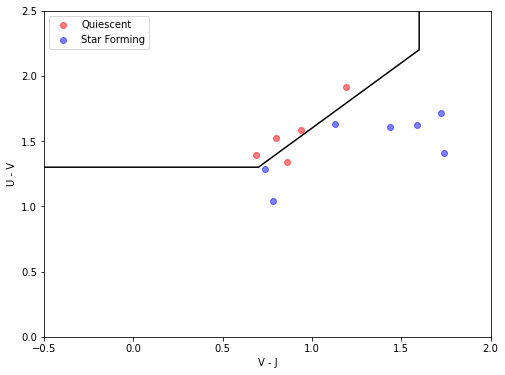

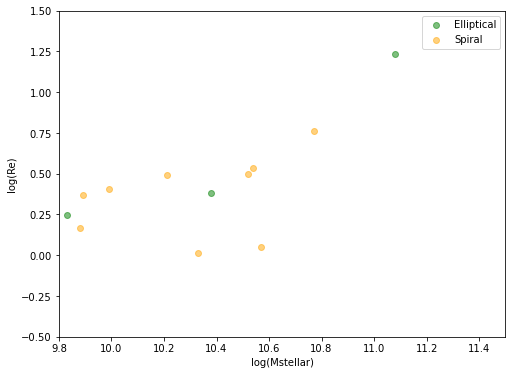

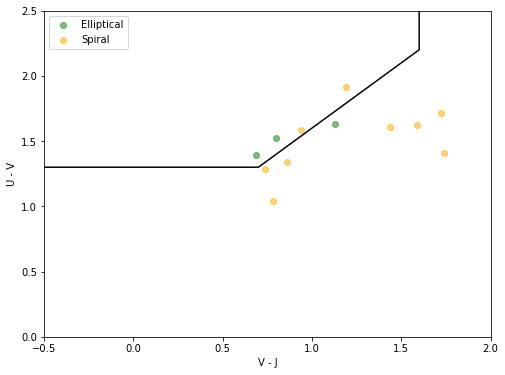

<Figure size 576x432 with 0 Axes>

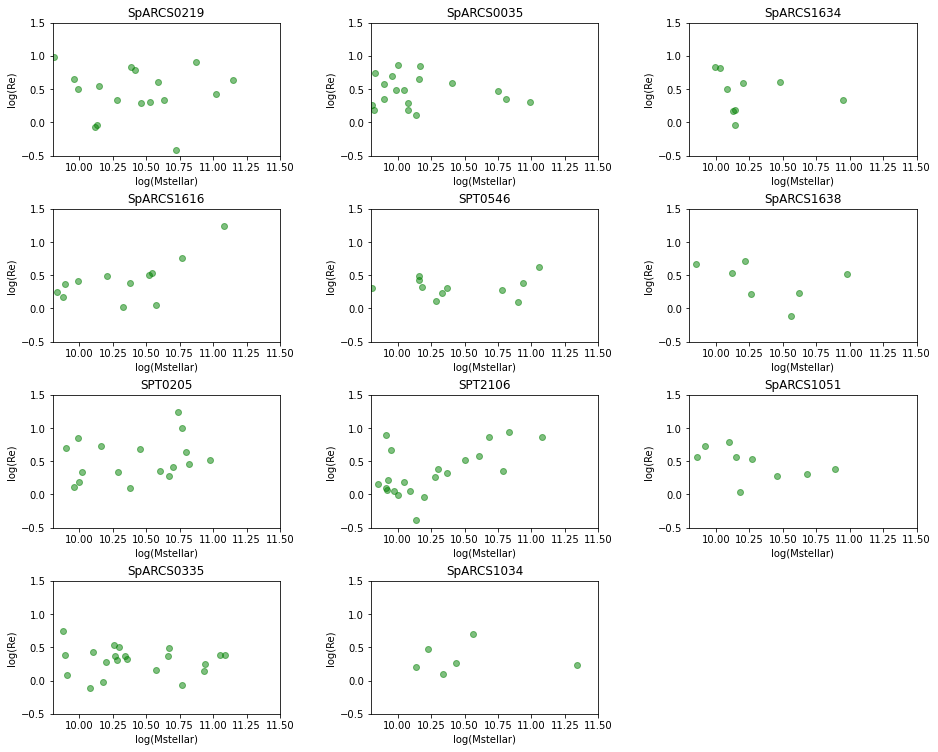

<Figure size 576x432 with 0 Axes>

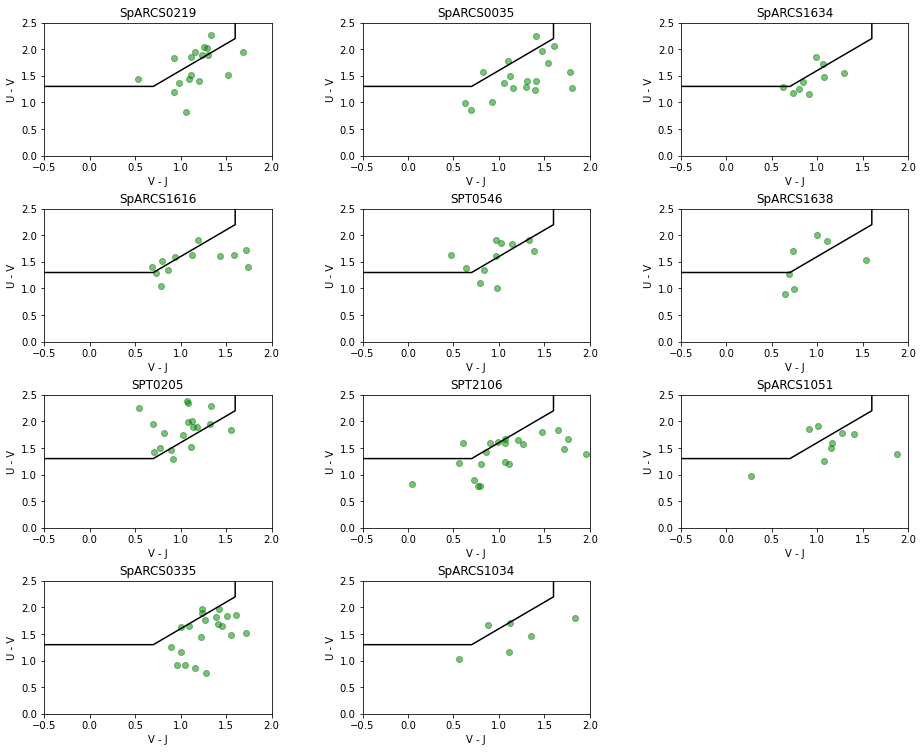

<Figure size 576x432 with 0 Axes>

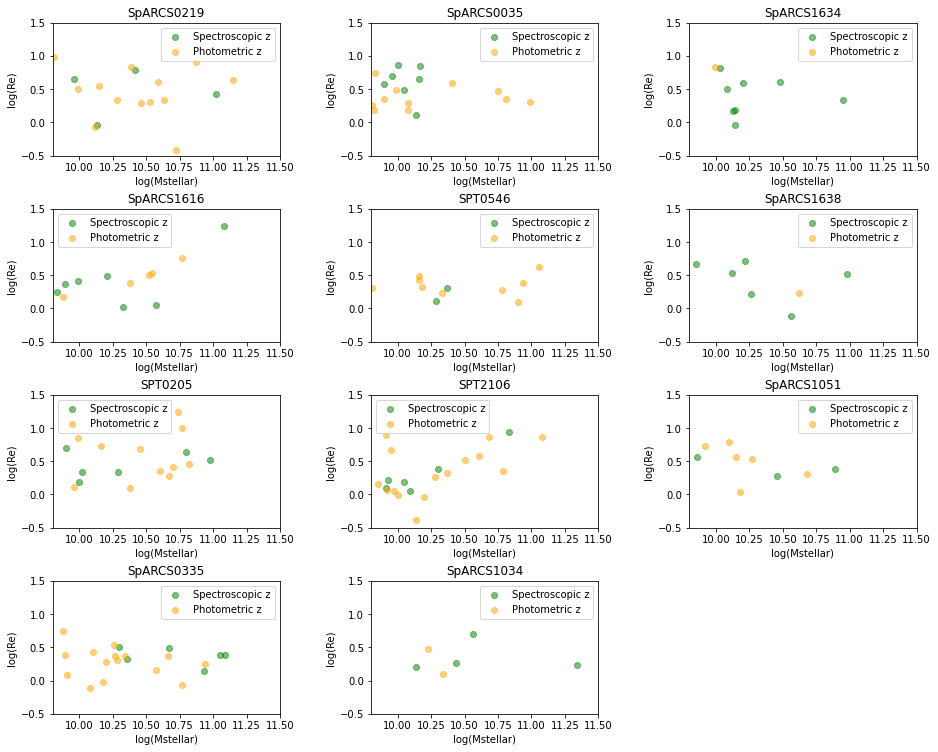

<Figure size 576x432 with 0 Axes>

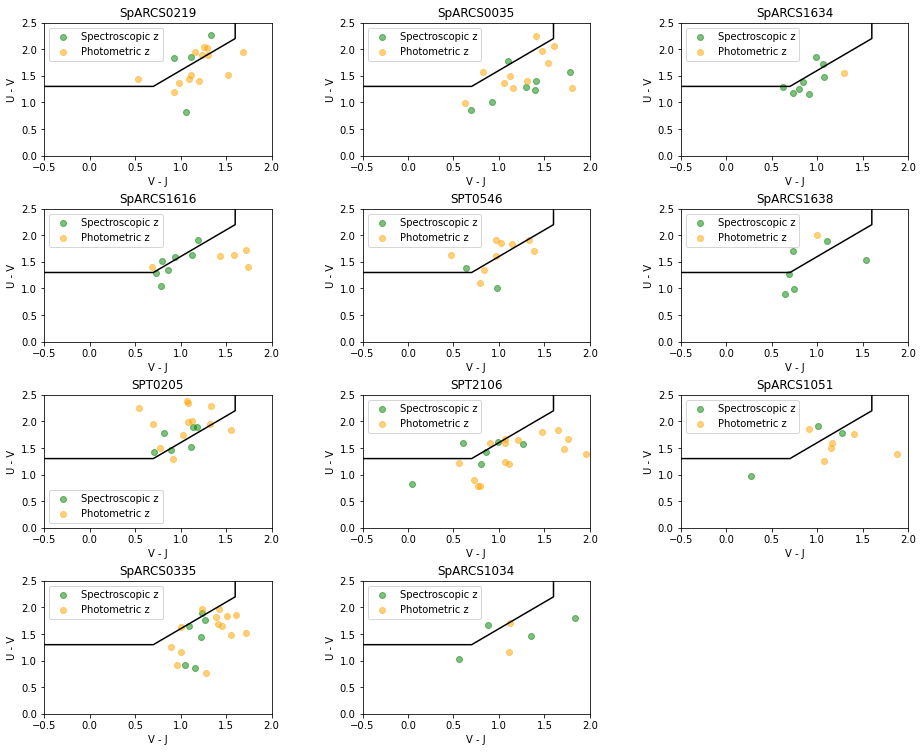

<Figure size 576x432 with 0 Axes>

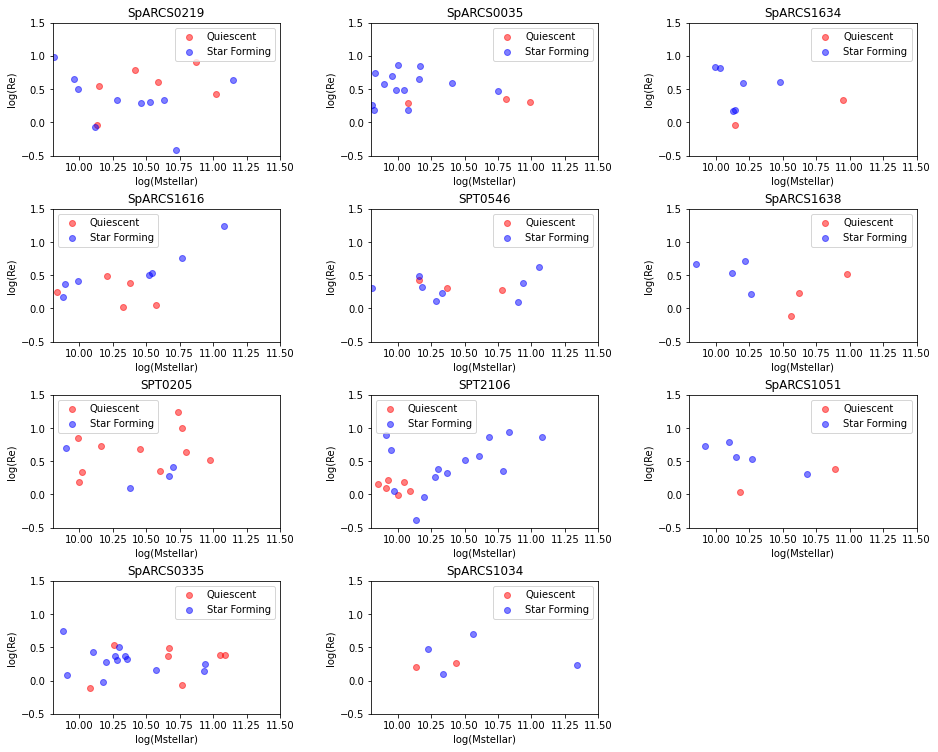

<Figure size 576x432 with 0 Axes>

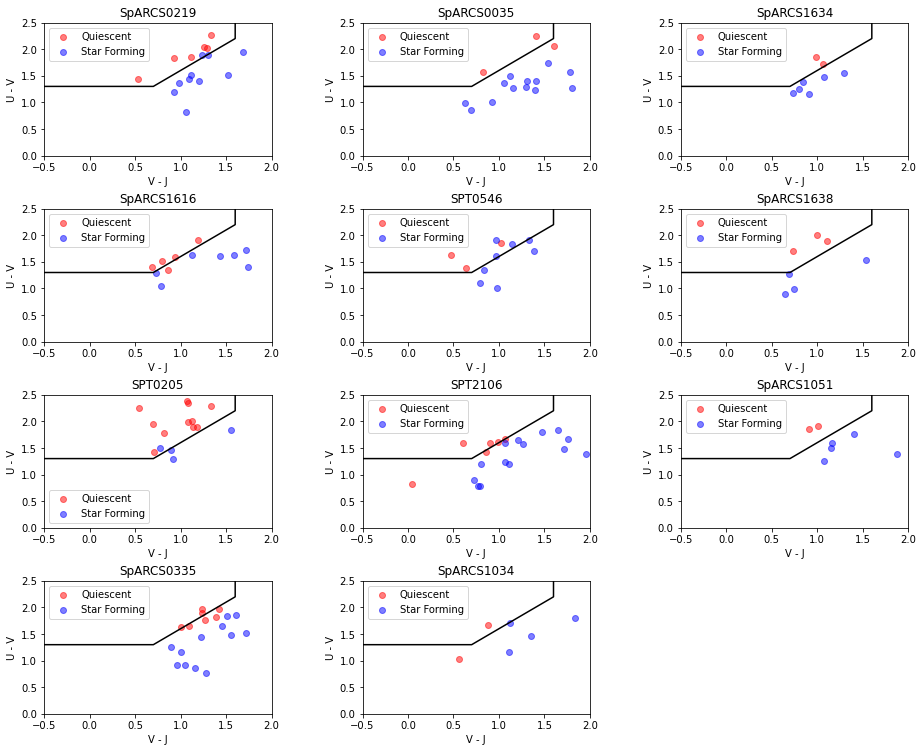

<Figure size 576x432 with 0 Axes>

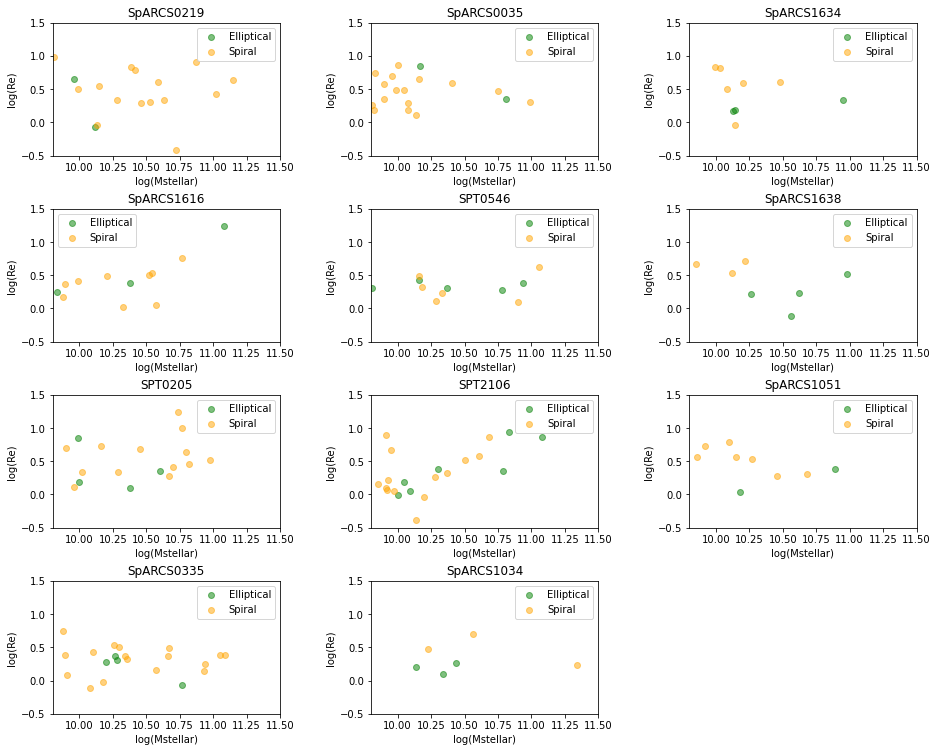

<Figure size 576x432 with 0 Axes>

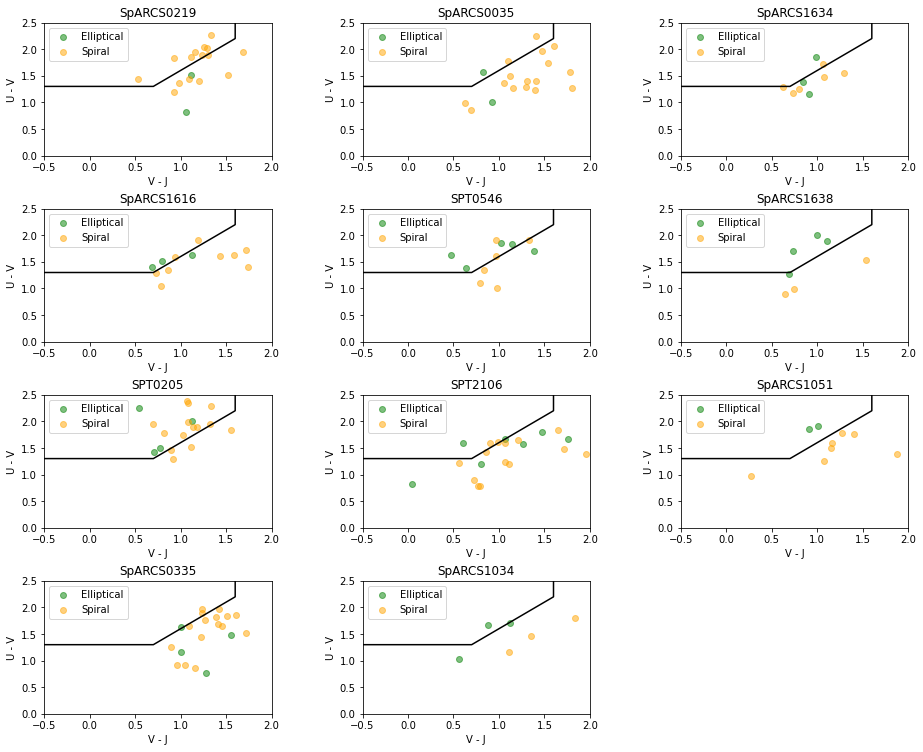

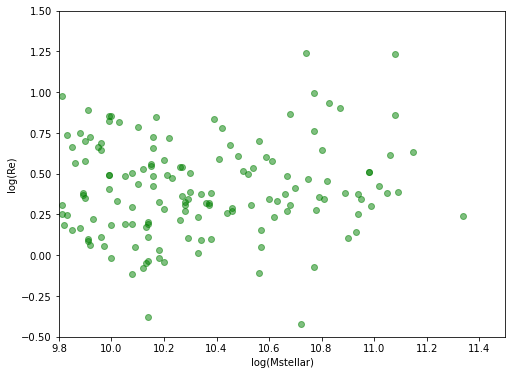

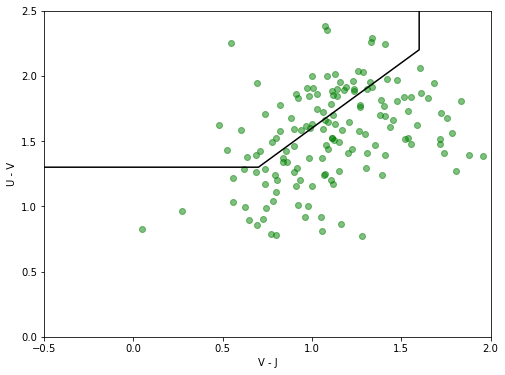

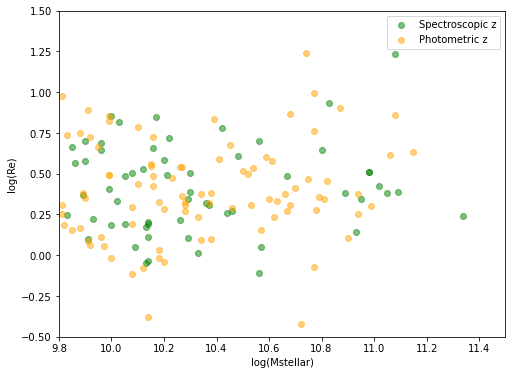

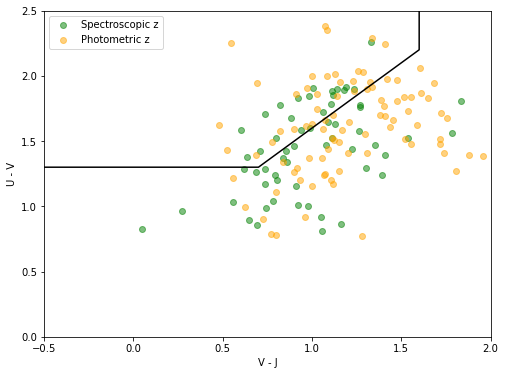

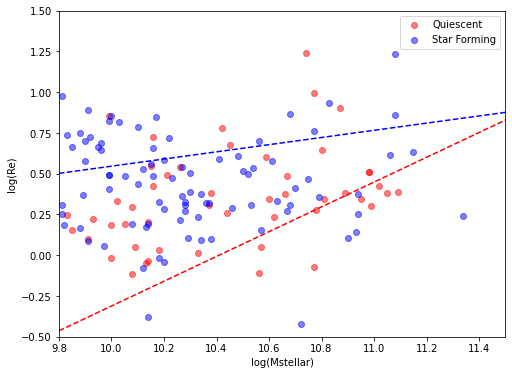

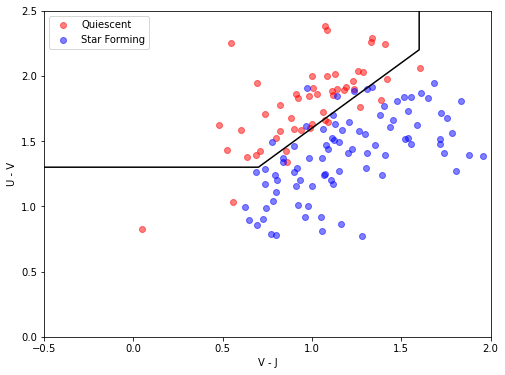

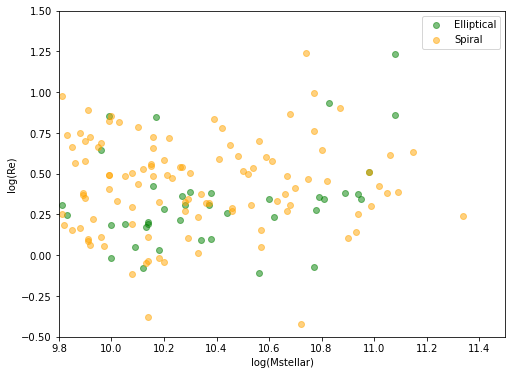

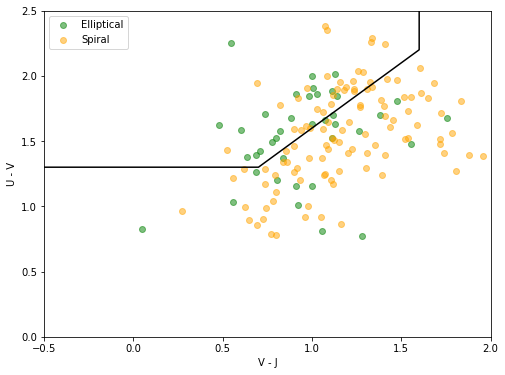

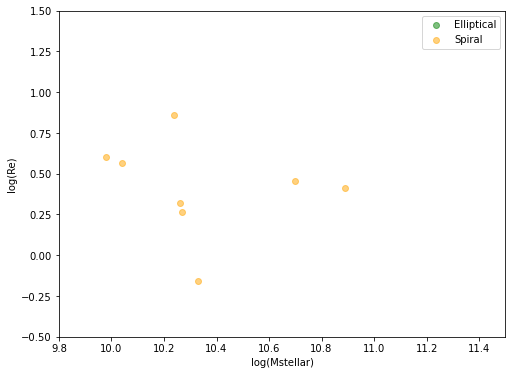

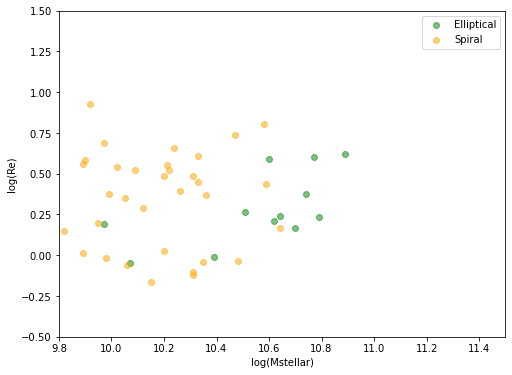

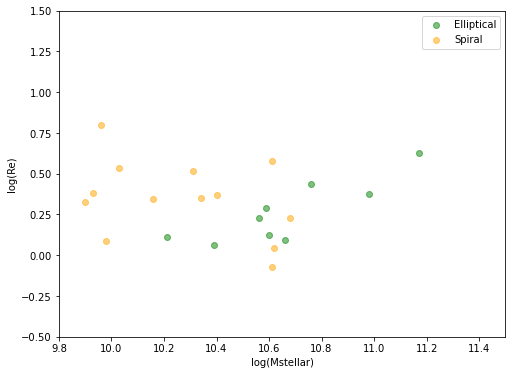

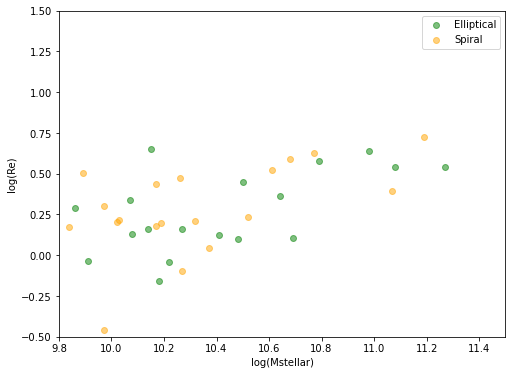

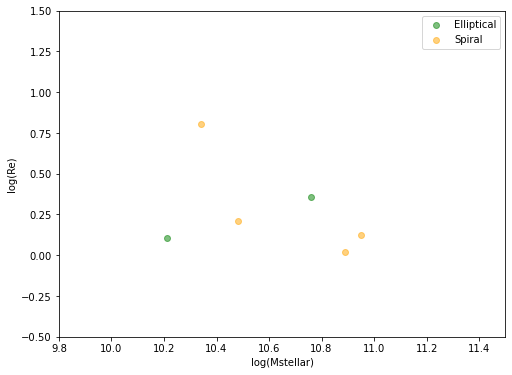

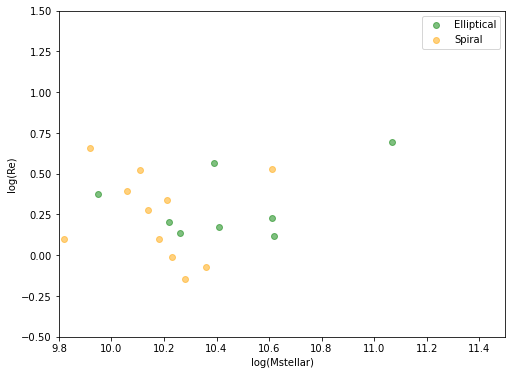

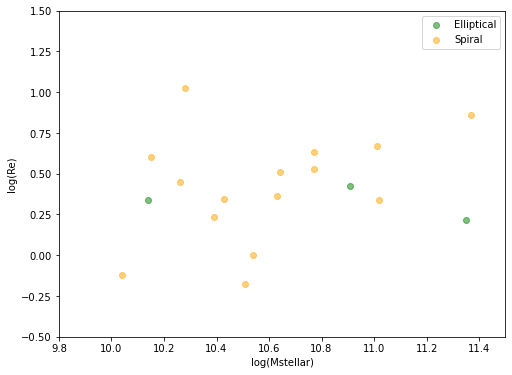

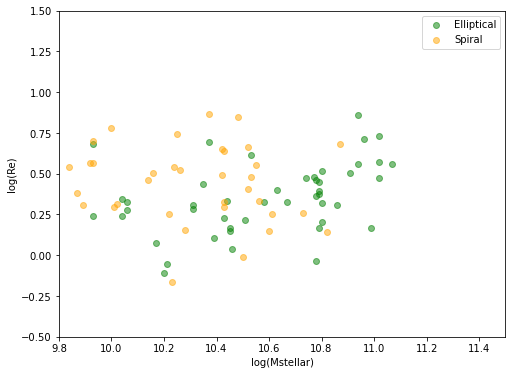

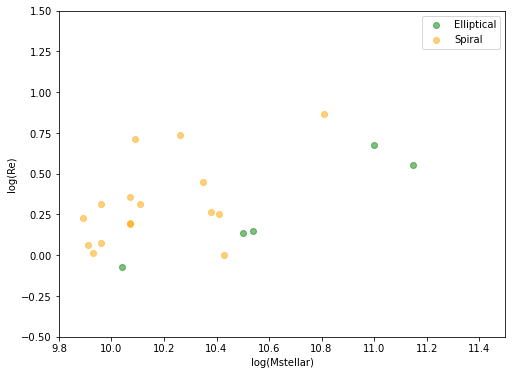

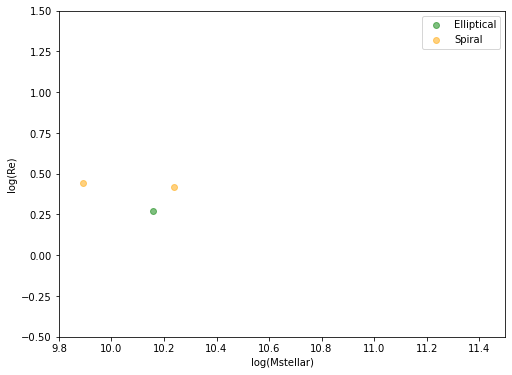

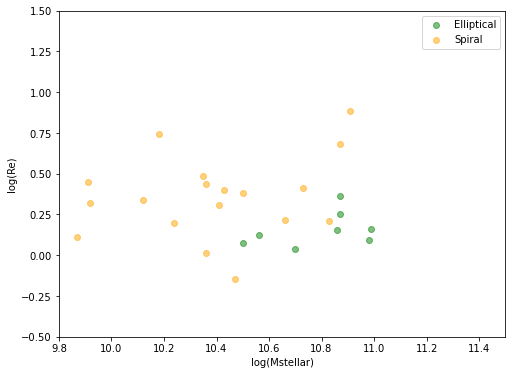

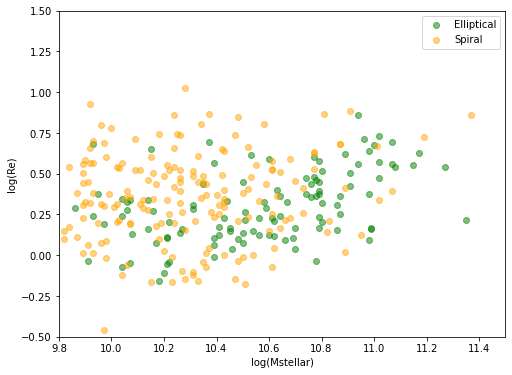

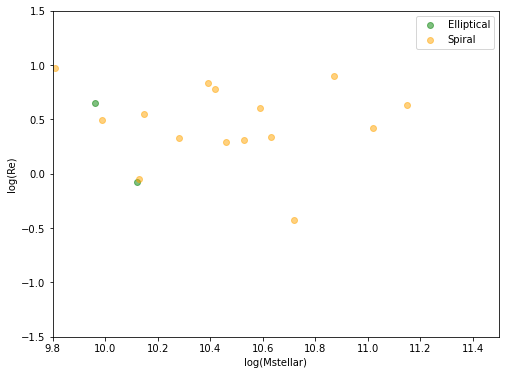

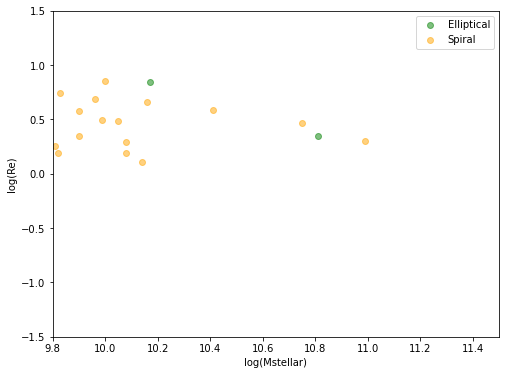

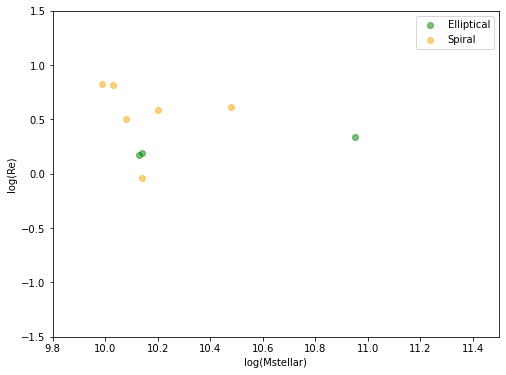

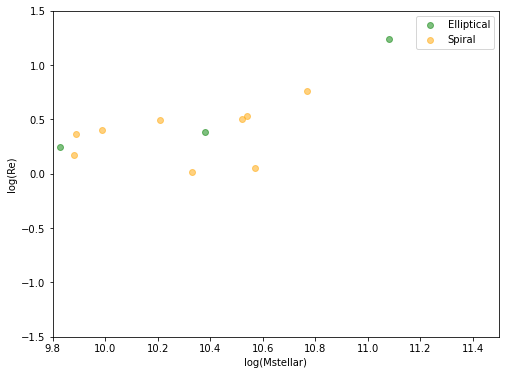

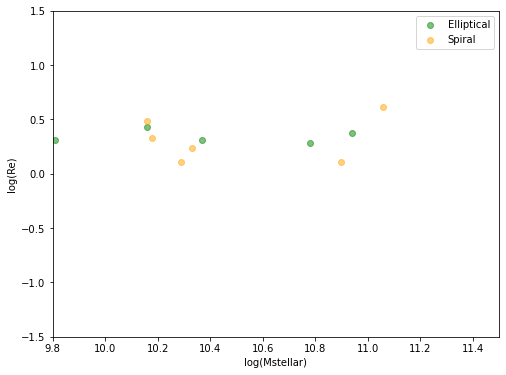

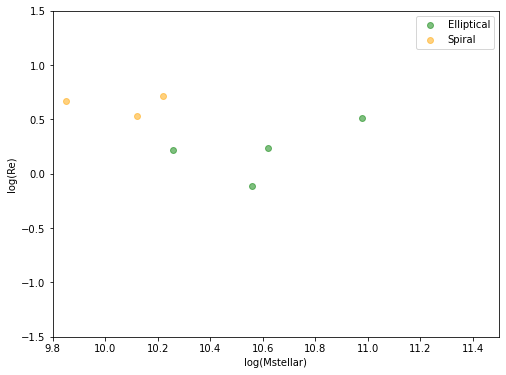

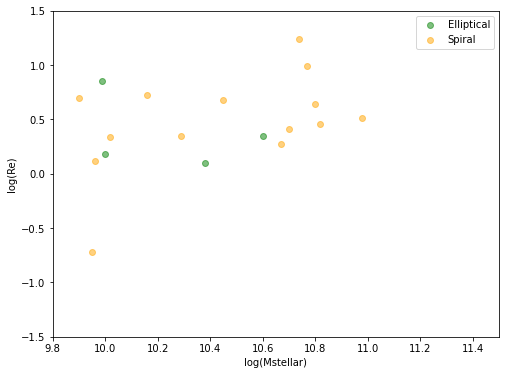

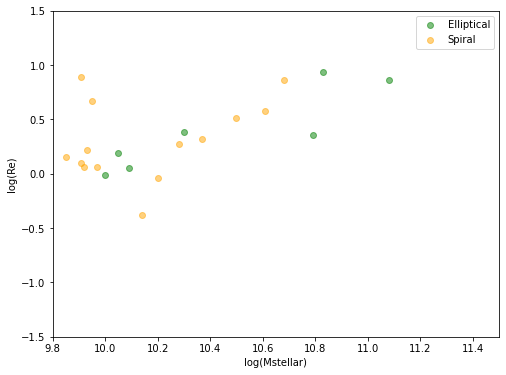

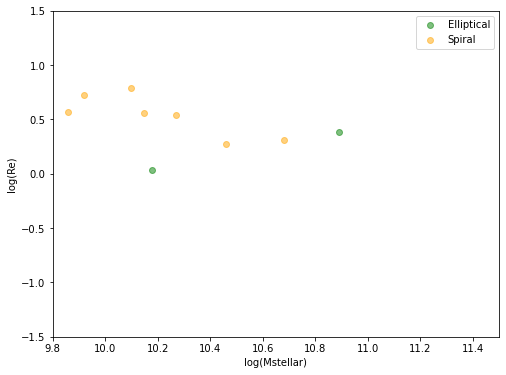

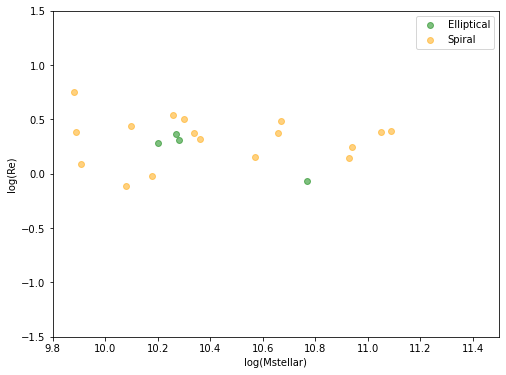

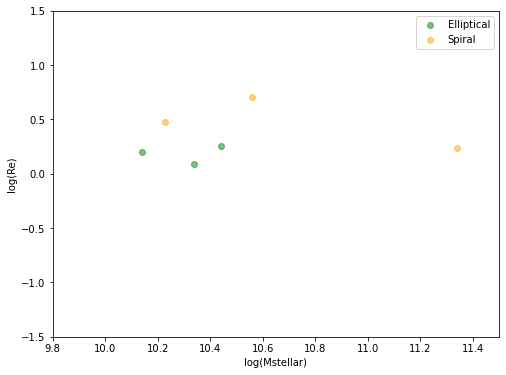

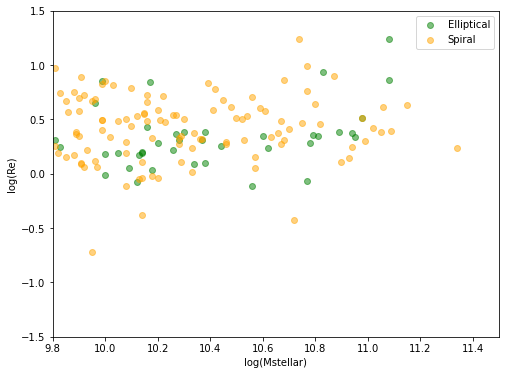

test passed.


In [20]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.testPlots(outputPath='C:/Users/panda/Documents/Github/GOGREEN-Research/Notebooks/testOutput.txt', truthPath='C:/Users/panda/Documents/Github/GOGREEN-Research/Notebooks/truth.txt')

The next test method, plotMcNabPlots(), also has no parameters and serves only to print information comparing the results of McNab et. al. 2021 to results producable by the class

Note that this method is not dependent on standard search criteria.

Total phot sample: 2989 - expected: 3062
Total spec sample: 691 - expected: 722
Total spec sample (above mass limit): 342 - expected: 342
Table 2
  Population  Total Sample  Cluster Members
0         SF          1917              356
1          Q           876              442
2         GV           349              104
3         BQ           230               91
4        PSB            52               30
Table 2 - Expected
  Population  Total Sample  Cluster Members
0         SF          1302              463
1          Q           702              504
2         GV           257              125
3         BQ           164              106
4        PSB            54               34
Table 3 - Difference
  Population  Total Sample  Cluster Members
0         SF           615             -107
1          Q           174              -62
2         GV            92              -21
3         BQ            66              -15
4        PSB            -2               -4


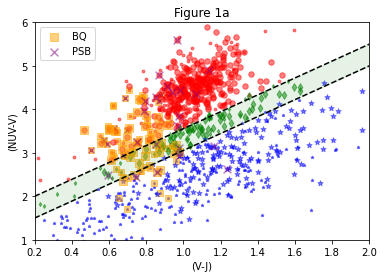

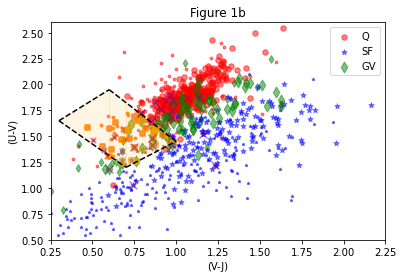

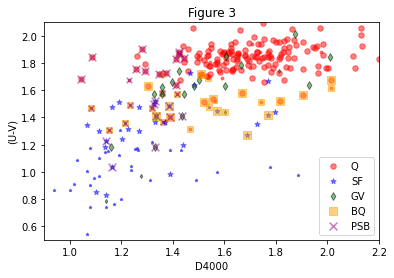

In [21]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plotMcNabPlots()

The final test method is evalLineFit(). Similar to the others, it takes no parameters and is not dependent on standard search criteria, as it only utilizes a fixed example in its test, which analyzes the accuracy of the line-fitting method used in the class by attempting to replicate a line equation given a set of artificial data with error values.

Actual values: slope = 1.213, intercept = -2.44
Estimated values: slope = 1.2130000000025043, intercept = -2.440000000027117


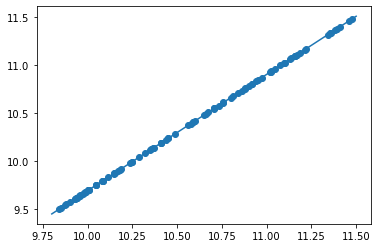

In [22]:
gg.evalLineFit()